DUOC UC<BR>
Minería de Datos
<BR>
Nombre de profesor: Gabriel Estivales<br>
Integrantes: Pamela Rosa Aldana Rojas  15405353-0<BR>
             Nicole Asenjo 18488212-4

#Metodología CRISP-DM



La metodología CRISP-DM (Cross Industry Standard Process for Data Mining) consta de seis fases: Comprensión del negocio, Comprensión de los datos, Preparación de los datos, Modelado, Evaluación e Implementación. Se utiliza el conjunto de datos meteorológicos de Australia

#**Fase 1. Comprensión del Negocio**


**Objetivo del Proyecto**

El objetivo de este proyecto es analizar los datos del clima en Australia para identificar patrones y tendencias utilizando técnicas de clustering no supervisadas. El modelo K-Means se aplicará para agrupar los datos climáticos y extraer información útil para la toma de decisiones.

**Contexto**

El proyecto se trata del estudio de un set de datos con lecturas relacionadas al clima en distintas ciudades de Australia.

El análisis del clima es crucial para diversos sectores como la agricultura, la gestión de recursos hídricos y la planificación urbana. Identificar patrones climáticos puede ayudar a prever eventos extremos y a planificar estrategias de mitigación.

**Relevancia del Análisis:**
Australia, siendo un continente con condiciones climáticas extremas y diversas, requiere predicciones precisas del clima para mitigar los impactos de fenómenos como sequías, inundaciones y ciclones.




**Objetivo del Negocio**

El objetivo principal es utilizar datos meteorológicos históricos para identificar patrones y realizar segmentaciones que puedan apoyar la toma de decisiones en el sector agrícola. La correcta segmentación de los datos permitirá  mejorar las predicciones de eventos climáticos críticos, como la lluvia, que afectan significativamente las actividades de este sector.

Preguntas Clave del Negocio

1. ¿Cuáles son los principales patrones climáticos en Australia?
2. ¿Cómo se agrupan las diferentes condiciones climáticas?
3. ¿Qué características climáticas son más relevantes ?

#**Fase 2. Comprensión de los Datos**


**Descripción de los Datos**

El conjunto de datos weatherAUS.csv contiene información histórica sobre condiciones climáticas en diversas ubicaciones de Australia. Las características incluyen:

**Descripción del Conjunto de Datos:**

Date: Fecha de la observación<br>
Location: Ubicación de la estación meteorológica<br>
MinTemp: Temperatura mínima en grados Celsius<br>
MaxTemp: Temperatura máxima en grados Celsius<br>
Lluvia: Cantidad de lluvia registrada ese día en mm.<br>
Evaporacion: Evaporación (mm) en 24 horas<br>
Sunshine: Número de horas de sol brillante en el día<br>
DirRafaga: Dirección de la ráfaga de viento más fuerte en 24 horas.<br>
VelRafaga: Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas.<br>
Dir9am: Dirección del viento a las 9am<br>
Dir3pm: Dirección del viento a las 3pm<br>
Vel9am: Velocidad (km/hr) del viento a las 9am<br>
Vel3pm: Velocidad (km/hr) del viento a las 3pm<br>
Hum9am: Porcentaje de humedad a las 9am<br>
Hum3pm: Porcentaje de humedad a las 3pm<br>
Pres9am: Presión atmosférica (hpa) a nivel del mar a las 9am<br>
Pres3pm: Presión atmosférica (hpa) a nivel del mar a las 3pm<br>
Nub9am: Fracción del cielo cubierto por nubes a las 9am.<br>
Nub3pm: Fracción del cielo cubierto por nubes a las 3pm.<br>
Temp9am: Temperatura en grados Celsius a las 9am<br>
Temp3pm: Temperatura en grados Celsius a las 3pm<br>
RainToday: Variable indicadora de si llovió hoy (>1 mm)<br>
RISK_MM: Cantidad de lluvia registrada en mm.(variable de riesgo cuánta lluvia registrada en milímetros)<br>
RainTomorrow: Variable objetivo, indicadora de si lloverá mañana (Sí/No)<br>


Para empezar se importacion de librerias y configuraciones iniciales necesarias para el desarrollo del proyecto

In [ ]:
from scipy.stats import pearsonr
import pickle as pickle
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#import category_encoders as ce

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [ ]:
#from google.colab import files
#uploaded = files.upload()
#for fn in uploaded.keys():
#  name=fn
name = '/content/weatherAUS.csv'

In [ ]:
df = pd.read_csv(name, sep=",", low_memory=False)

In [ ]:
df1=df

In [ ]:
df2=df

In [ ]:
df3=df

###**Analisis exploratorio de los datos**

Empezamos analizando el set de datos que vamos a trabajar para comprender lo que tenemos.

In [ ]:
df.shape

(142193, 24)

***Descripción del dataset:***

**Registros**: 142.193
**Variables:** 24
**Variables:**

**Características numéricas:** 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am''Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM .

**Características categóricas:**'Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday'

**Variable objetivo**: RainTomorrow (Sí/No).

**Muestra aleatoria de todo el set de datos con tamaño de 10 filas**

In [ ]:
df.head(10)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
5  2008-12-06   Albury     14.6     29.7       0.2          NaN       NaN   
6  2008-12-07   Albury     14.3     25.0       0.0          NaN       NaN   
7  2008-12-08   Albury      7.7     26.7       0.0          NaN       NaN   
8  2008-12-09   Albury      9.7     31.9       0.0          NaN       NaN   
9  2008-12-10   Albury     13.1     30.1       1.4          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   
5         WNW           56.0          W  ...        23.0       1009.2   
6           W           50.0         SW  ...        19.0       1009.6   
7           W           35.0        SSE  ...        19.0       1013.4   
8         NNW           80.0         SE  ...         9.0       1008.9   
9           W           28.0          S  ...        27.0       1007.0   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   
5       1005.4       NaN       NaN     20.6     28.9         No      0.0   
6       1008.2       1.0       NaN     18.1     24.6         No      0.0   
7       1010.1       NaN       NaN     16.3     25.5         No      0.0   
8       1003.6       NaN       NaN     18.3     30.2         No      1.4   
9       1005.7       NaN       NaN     20.1     28.2        Yes      0.0   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  
5            No  
6            No  
7            No  
8           Yes  
9            No  

[10 rows x 24 columns]

In [ ]:
df.shape

(142193, 24)

Con este codigo revisamos el tamaño del set y los tipos de datos que hay en cada columna. El dataset consta de 142.193 filas repartidas en 24 columnas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Podemos ver que el dataset tiene 17 variables dtype float, tiene 7 variables dtype Object .

In [ ]:
df["RainTomorrow"].head(10)

0     No
1     No
2     No
3     No
4     No
5     No
6     No
7     No
8    Yes
9     No
Name: RainTomorrow, dtype: object

La variable objetivo es RainTomorrow que es de dtype object y nos entrega clases no y yes.

## Estadistica Descriptiva

In [ ]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm        RISK_MM  
count  88536.000000  85099.000000  141289.000000  139467.000000  142193.000000  
mean       4.437189      4.503167      16.987509      21.687235       2.360682  
std        2.887016      2.720633       6.492838       6.937594       8.477969  
min        0.000000      0.000000      -7.200000      -5.400000       0.000000  
25%        1.000000      2.000000      12.300000      16.600000       0.000000  
50%        5.000000      5.000000      16.700000      21.100000       0.000000  
75%        7.000000      7.000000      21.600000      26.400000       0.800000  
max        9.000000      9.000000      40.200000      46.700000     371.000000

**Análisis Descriptivo de los Cuartiles de Temperatura y Precipitación**
Al realizar un análisis preliminar de los datos de temperatura mínima y máxima, así como de las precipitaciones, se pueden observar las siguientes características destacadas en los cuartiles:

**Temperatura Mínima (MinTemp)**
* Primer Cuartil (Q1): La temperatura mínima del primer cuartil varía entre -8.5 y 7.6 grados Celsius, cubriendo un rango de aproximadamente 16 grados. Esto indica una alta variabilidad en las temperaturas más bajas.
* Segundo Cuartil (Q2): Entre el primer cuartil y la mediana, la temperatura oscila entre 7.6 y 12 grados Celsius, presentando un rango más estrecho de unos 4.4 grados.
* Tercer Cuartil (Q3): Entre la mediana y el tercer cuartil, la temperatura varía de 12 a 16.8 grados Celsius, con un rango de aproximadamente 4.8 grados.
* Cuarto Cuartil (Q4): La temperatura en el cuarto cuartil oscila entre 16.8 y 33.9 grados Celsius, mostrando un rango de aproximadamente 17 grados. Este rango más amplio sugiere que las temperaturas más altas tienen una mayor dispersión.

**Temperatura Máxima (MaxTemp)**
* Primer Cuartil (Q1): La temperatura máxima del primer cuartil se sitúa entre -4.8 y 17.9 grados Celsius, cubriendo un rango de aproximadamente 22.7 grados.
* Segundo Cuartil (Q2): Entre el primer cuartil y la mediana, la temperatura varía entre 17.9 y 22.6 grados Celsius, abarcando un rango de 4.7 grados.
* Tercer Cuartil (Q3): Entre la mediana y el tercer cuartil, la temperatura fluctúa de 22.6 a 28.2 grados Celsius, presentando un rango de 5.6 grados.
* Cuarto Cuartil (Q4): La temperatura en el cuarto cuartil oscila entre 28.2 y 48.1 grados Celsius, con un rango de aproximadamente 19.9 grados, mostrando una mayor dispersión en las temperaturas más altas.

**Precipitaciones (Rainfall)**
* Primer a Tercer Cuartil (Q1-Q3): La mayoría de los datos de precipitaciones se concentran en valores bajos, ya que los valores de los primeros tres cuartiles (Q1, Q2 y Q3) son todos 0 mm. Esto indica que hubo pocos días con precipitaciones registradas.
* Cuarto Cuartil (Q4): En el cuarto cuartil, las precipitaciones varían entre 0.8 mm y 371 mm, con un rango considerable de aproximadamente 370.2 mm. Esto sugiere que las lluvias fueron escasas pero intensas en ciertos días.


Estos análisis muestran la variabilidad en las temperaturas mínimas y máximas, con una dispersión mayor en los extremos de los cuartiles. Las precipitaciones, por otro lado, muestran que la mayoría de los días tuvieron poca o ninguna lluvia, concentrándose las precipitaciones en eventos menos frecuentes pero más intensos.

Esta interpretación permite una comprensión detallada de las características climáticas en los datos, proporcionando una base sólida para futuros análisis y modelos predictivos.

##**Datos Faltantes**

In [ ]:
df.isna().sum(axis=0)

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

Se muestra  un resumen de los valores faltantes (NaN) en cada columna del DataFrame.

**Columnas con muchos valores faltantes**

- Evaporation (60,843 faltantes)
- Sunshine (67,816 faltantes)
- Cloud9am (53,657 faltantes)
- Cloud3pm (57,094 faltantes)
- Estas columnas tienen una gran cantidad de valores faltantes y se tienen que tratar ya sea con la imputación de valores o su eliminacion si se considera que no aportan valor significativo al análisis.

**Columnas con pocos valores faltantes:**

MinTemp (637 faltantes),MaxTemp (322 faltantes),Rainfall (1406 faltantes)Humidity9am (1774 faltantes),
Humidity3pm (3610 faltantes),
Temp9am (904 faltantes),
Temp3pm (2726 faltantes),
RainToday (1406 faltantes),
- Estas columnas tienen relativamente pocos valores faltantes, lo que facilita su tratamiento mediante técnicas de imputación simples.

**Estrategia de tratamiento:**
Eliminación de columnas:

- Columnas como Evaporation y Sunshine, con más de 60,000 valores faltantes, podrían ser eliminadas si se considera que su imputación no es factible o si no aportan significativamente al análisis.
- Imputación de valores faltantes:

Para columnas con menos valores faltantes, se pueden utilizar técnicas de imputación como la media, mediana o métodos más avanzados como KNN imputation.
- Eliminación de filas:

Si los valores faltantes son pocos y dispersos, se podrían eliminar las filas que contienen valores faltantes, aunque esto puede llevar a una reducción en la cantidad de datos disponibles.
- Análisis de correlación:

Antes de decidir qué columnas eliminar o imputar, se puede realizar un análisis de correlación para entender la importancia de cada variable en relación con las otras.


In [ ]:
df.isna().sum().sum()

316559

El total datos nulos es de 316.559 datos.

## **Variables Numericas**

In [ ]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Ver las primeras filas del DataFrame filtrado
df_numerico.head()


MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          NaN       NaN           44.0   
1      7.4     25.1       0.0          NaN       NaN           44.0   
2     12.9     25.7       0.0          NaN       NaN           46.0   
3      9.2     28.0       0.0          NaN       NaN           24.0   
4     17.5     32.3       1.0          NaN       NaN           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RISK_MM  
0       1007.1       8.0       NaN     16.9     21.8      0.0  
1       1007.8       NaN       NaN     17.2     24.3      0.0  
2       1008.7       NaN       2.0     21.0     23.2      0.0  
3       1012.8       NaN       NaN     18.1     26.5      1.0  
4       1006.0       7.0       8.0     17.8     29.7      0.2

In [ ]:
df_numerico.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')

###**Correlacion**

Se calcula la correlación de las columnas numéricas lo permite ver fácilmente las relaciones entre las diferentes variables climáticas, destacando tanto las correlaciones positivas como las negativas  

In [ ]:
corr = df.corr(numeric_only=True)
corr


MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736267  0.104255     0.467261  0.072961   
MaxTemp        0.736267  1.000000 -0.074839     0.588915  0.469967   
Rainfall       0.104255 -0.074839  1.000000    -0.064549 -0.227525   
Evaporation    0.467261  0.588915 -0.064549     1.000000  0.366607   
Sunshine       0.072961  0.469967 -0.227525     0.366607  1.000000   
WindGustSpeed  0.177285  0.067690  0.133497     0.203001 -0.032831   
WindSpeed9am   0.176005  0.014680  0.086816     0.193936  0.008040   
WindSpeed3pm   0.175749  0.050800  0.057759     0.128895  0.056012   
Humidity9am   -0.234211 -0.505432  0.223725    -0.505890 -0.491603   
Humidity3pm    0.005999 -0.509270  0.255312    -0.392785 -0.629122   
Pressure9am   -0.451260 -0.332293 -0.168085    -0.269907  0.040959   
Pressure3pm   -0.461623 -0.427279 -0.126728    -0.293160 -0.020464   
Cloud9am       0.077625 -0.289865  0.198195    -0.185032 -0.675610   
Cloud3pm       0.020489 -0.279053  0.171993    -0.184287 -0.704202   
Temp9am        0.901813  0.887020  0.011477     0.545497  0.291139   
Temp3pm        0.708865  0.984562 -0.079178     0.574275  0.490180   
RISK_MM        0.124743 -0.044208  0.308557    -0.043498 -0.294973   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.177285      0.176005      0.175749    -0.234211   
MaxTemp             0.067690      0.014680      0.050800    -0.505432   
Rainfall            0.133497      0.086816      0.057759     0.223725   
Evaporation         0.203001      0.193936      0.128895    -0.505890   
Sunshine           -0.032831      0.008040      0.056012    -0.491603   
WindGustSpeed       1.000000      0.604837      0.686419    -0.215461   
WindSpeed9am        0.604837      1.000000      0.519971    -0.270807   
WindSpeed3pm        0.686419      0.519971      1.000000    -0.145942   
Humidity9am        -0.215461     -0.270807     -0.145942     1.000000   
Humidity3pm        -0.026663     -0.031607      0.015903     0.667388   
Pressure9am        -0.457891     -0.227923     -0.295567     0.139519   
Pressure3pm        -0.412922     -0.174916     -0.254988     0.186955   
Cloud9am            0.071235      0.024280      0.052780     0.452182   
Cloud3pm            0.109088      0.053584      0.025269     0.358043   
Temp9am             0.150258      0.129298      0.163601    -0.472826   
Temp3pm             0.032970      0.005108      0.028567    -0.499777   
RISK_MM             0.162923      0.069404      0.049240     0.172417   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.005999    -0.451260    -0.461623  0.077625  0.020489   
MaxTemp          -0.509270    -0.332293    -0.427279 -0.289865 -0.279053   
Rainfall          0.255312    -0.168085    -0.126728  0.198195  0.171993   
Evaporation      -0.392785    -0.269907    -0.293160 -0.185032 -0.184287   
Sunshine         -0.629122     0.040959    -0.020464 -0.675610 -0.704202   
WindGustSpeed    -0.026663    -0.457891    -0.412922  0.071235  0.109088   
WindSpeed9am     -0.031607    -0.227923    -0.174916  0.024280  0.053584   
WindSpeed3pm      0.015903    -0.295567    -0.254988  0.052780  0.025269   
Humidity9am       0.667388     0.139519     0.186955  0.452182  0.358043   
Humidity3pm       1.000000    -0.027449     0.051840  0.517037  0.523270   
Pressure9am      -0.027449     1.000000     0.961348 -0.130081 -0.148139   
Pressure3pm       0.051840     0.961348     1.000000 -0.061152 -0.084963   
Cloud9am          0.517037    -0.130081    -0.061152  1.000000  0.604118   
Cloud3pm          0.523270    -0.148139    -0.084963  0.604118  1.000000   
Temp9am          -0.221467    -0.422773    -0.470325 -0.137843 -0.127869   
Temp3pm          -0.557989    -0.287301    -0.389863 -0.302520 -0.318254   
RISK_MM           0.313183    -0.163673    -0.164184  0.198095  0.234814   

                Temp9am   Temp3pm   RISK_MM  
MinTemp        0.901813  

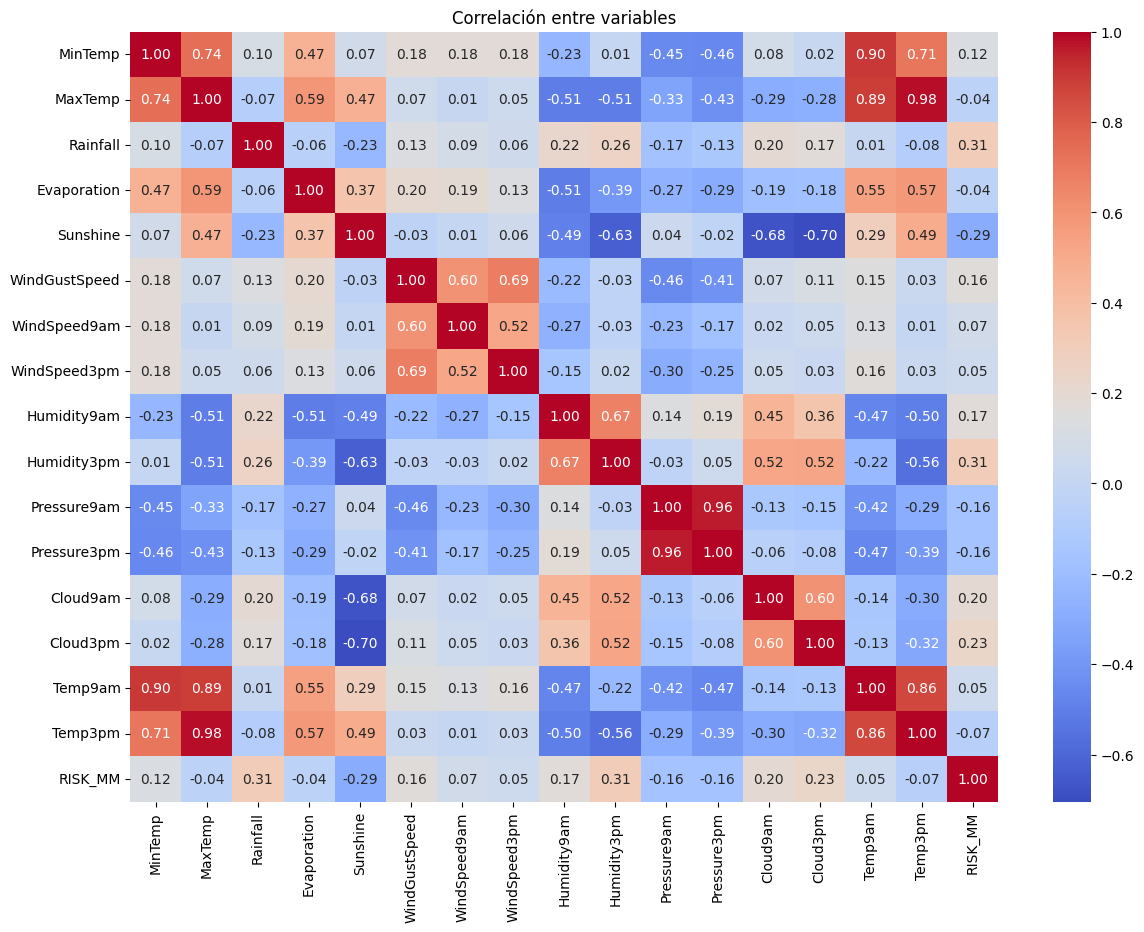

In [ ]:
# Visualizar la correlación entre las variables
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlación entre variables')
plt.show()



Se analiza la correlación que existe en las variables entre si,  teniendo en cuenta que aunque exista correlación no necesariamente implica que exista causalidad.<br>
Se observa que existen correlaciones tanto positivas como negativas.

**Correlaciones Fuertes y Positivas:**
* MinTemp y MaxTemp (0.736): La temperatura mínima y máxima diarias están fuertemente correlacionadas, lo que indica que los días más cálidos tienden a tener tanto temperaturas mínimas como máximas más altas.
* MaxTemp y Temp3pm (0.985): La temperatura máxima del día está muy fuertemente correlacionada con la temperatura a las 3 PM. Se entiende quelas temperaturas más altas del día suelen registrarse por la tarde.
* Temp9am y Temp3pm (0.861): Las temperaturas registradas a las 9 AM y a las 3 PM están fuertemente correlacionadas, indican que si la mañana es cálida, la tarde también lo será.

**Correlaciones Fuertes y Negativas:**
* MaxTemp y Humidity3pm (-0.509): La temperatura máxima está inversamente correlacionada con la humedad a las 3 PM. Los días más cálidos suelen tener menor humedad por la tarde.
* Sunshine y Humidity3pm (-0.629): La cantidad de horas de sol está inversamente correlacionada con la humedad a las 3 PM, indicando que días más soleados tienden a ser menos húmedos.
* Sunshine y Cloud3pm (-0.704): La cantidad de sol está fuertemente inversamente correlacionada con la nubosidad a las 3 PM. Esto es lógico ya que más sol significa menos nubes.

## Histograma
Revisamos la distribucion de las variables.


Para identificar las variables que tienen a una distribución normal, es útil observar la media y la desviación estándar, así como considerar la simetría de los datos.
- Simetría: La distribución es simétrica alrededor de la media.
- Media y mediana iguales: La media y la mediana son aproximadamente iguales.
- Kurtosis y sesgo: La kurtosis (medida de la "forma" de la distribución de la cola) y el sesgo (asimetría) son cercanos a cero en una distribución normal estándar.

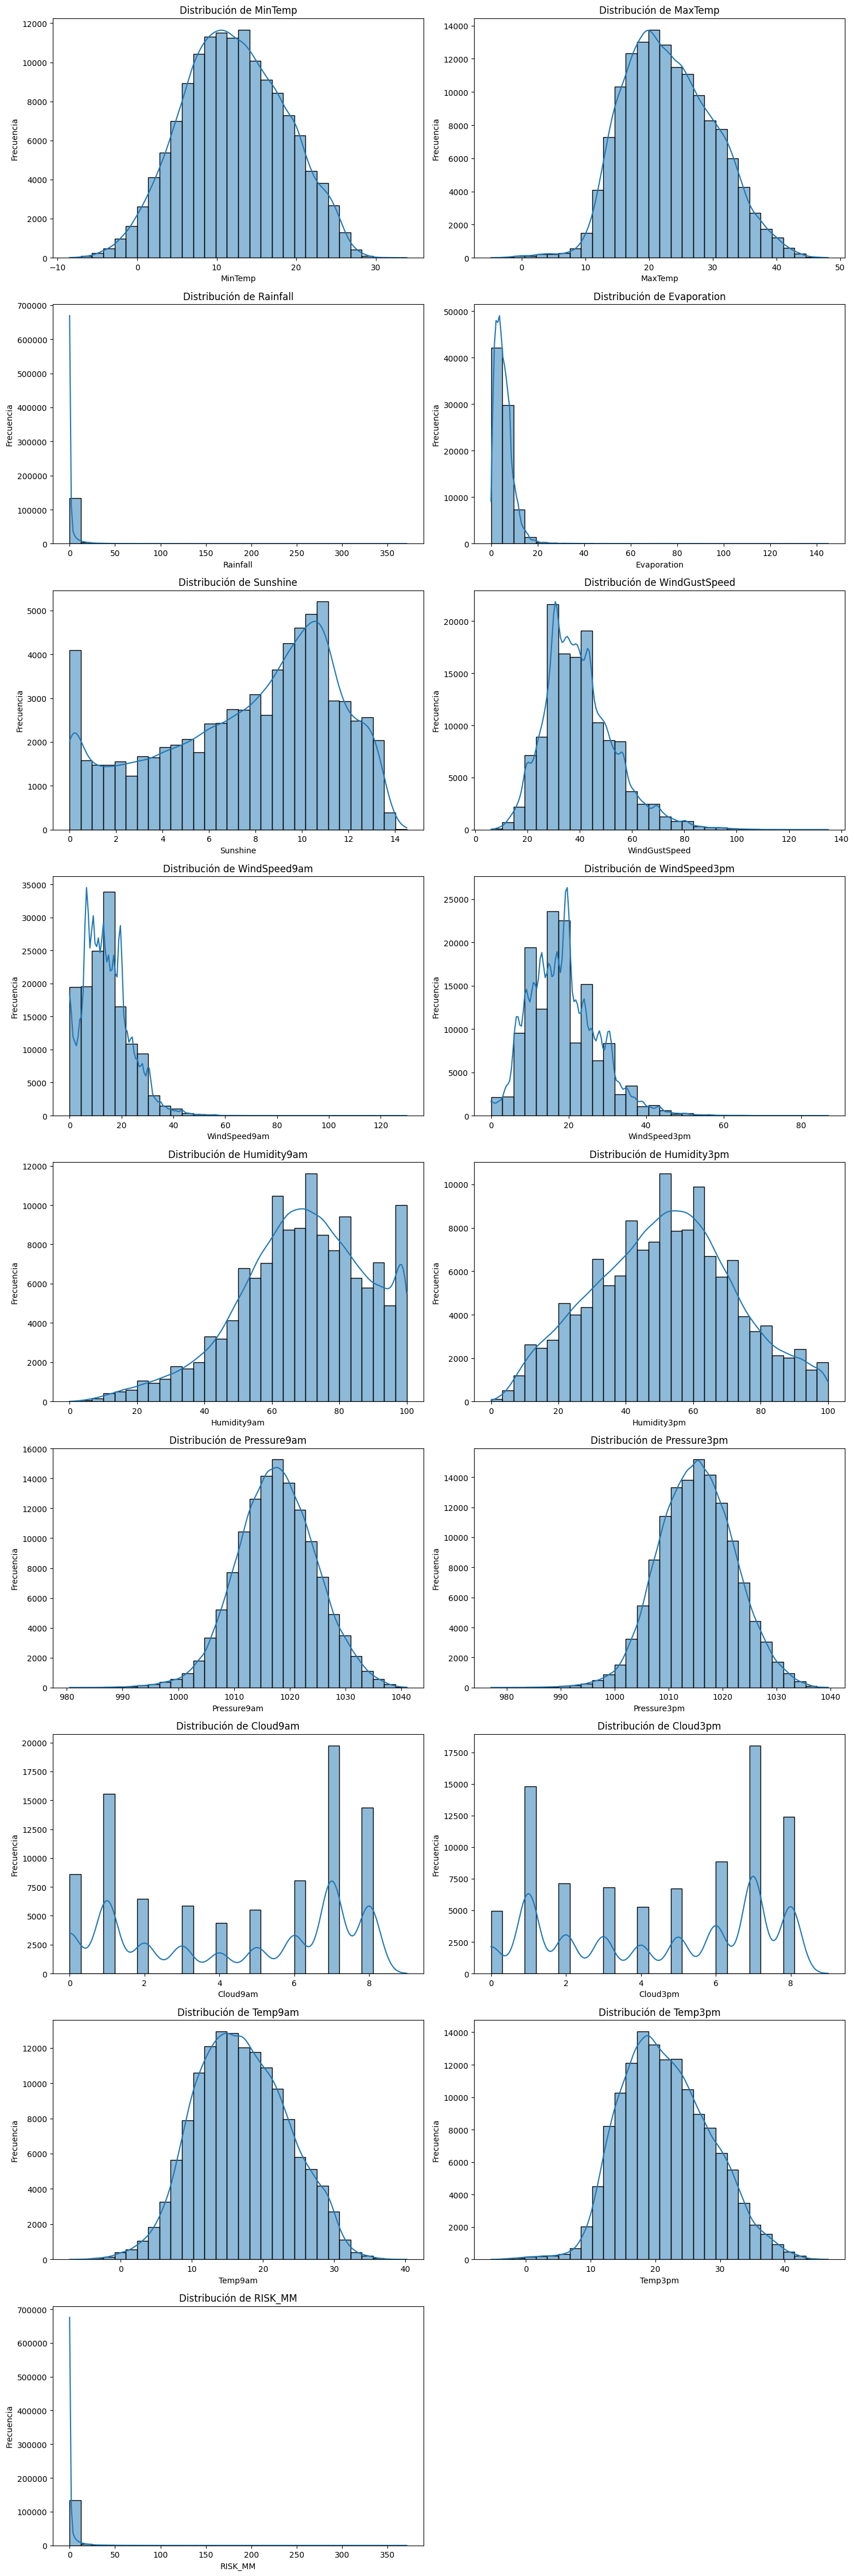

In [ ]:
# Obtener todas las columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Configurar el tamaño de las figuras según la cantidad de variables
num_cols = len(numeric_columns)
num_rows = (num_cols + 1) // 2  # Número de filas necesarias para la cuadrícula de 2 columnas

plt.figure(figsize=(15, num_rows * 5))

# Crear un gráfico de distribución para cada variable numérica
for i, var in enumerate(numeric_columns):
    plt.subplot(num_rows, 2, i + 1)  # Crear una cuadrícula de num_rows filas y 2 columnas
    sns.histplot(df[var].dropna(), kde=True, bins=30)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Las variables :
- MinTemp y MaxTemp: Ambos tienen una media cercana a la mediana, lo que sugiere una posible distribución normal.
- Temp9am y Temp3pm: También muestran una media cercana a la mediana con tendencia a distribucion normal
-  Humidity3pm, pressure9am, preassure3amse visualizan con tendencia a una distribucion normal.

## Variables Categoricas

In [ ]:
# Seleccionar solo las columnas de tipo object
df_obj = df.select_dtypes(include=['object'])
df_obj

Date Location WindGustDir WindDir9am WindDir3pm RainToday  \
0       2008-12-01   Albury           W          W        WNW        No   
1       2008-12-02   Albury         WNW        NNW        WSW        No   
2       2008-12-03   Albury         WSW          W        WSW        No   
3       2008-12-04   Albury          NE         SE          E        No   
4       2008-12-05   Albury           W        ENE         NW        No   
...            ...      ...         ...        ...        ...       ...   
142188  2017-06-20    Uluru           E        ESE          E        No   
142189  2017-06-21    Uluru           E         SE        ENE        No   
142190  2017-06-22    Uluru         NNW         SE          N        No   
142191  2017-06-23    Uluru           N         SE        WNW        No   
142192  2017-06-24    Uluru          SE        SSE          N        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
142188           No  
142189           No  
142190           No  
142191           No  
142192           No  

[142193 rows x 7 columns]

In [ ]:
df_obj.columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

**Grafico de barra**

Se muestra la frecuencia de cada clase en la respectiva columna ,  permiten visualizar rápidamente qué clase son más comunes en cada variable categórica.
- Tambien permite ver el balanceo de las clases.


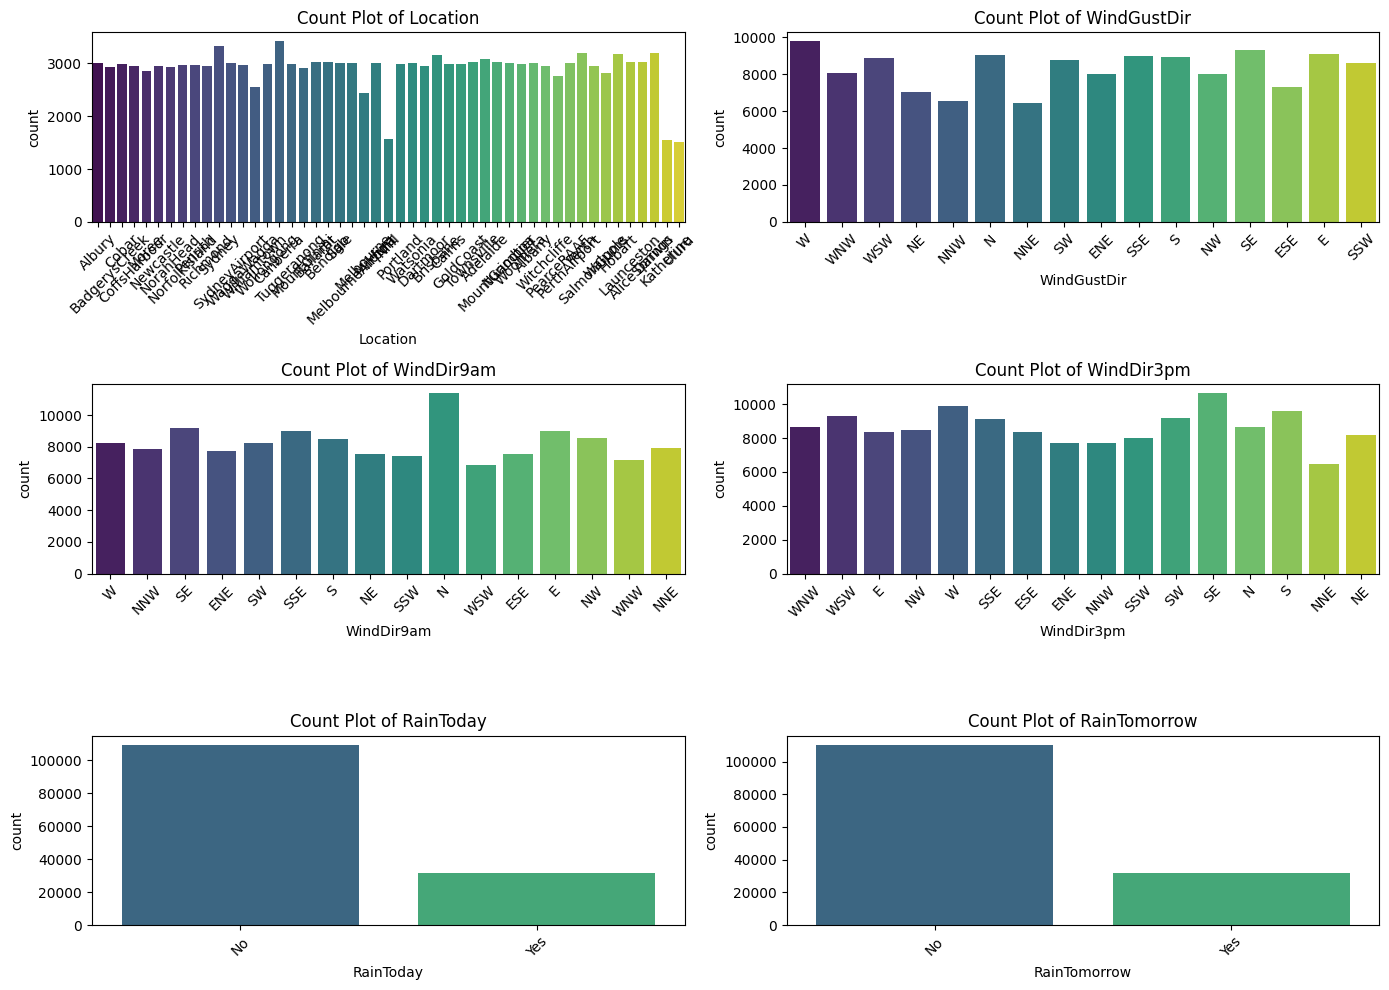

In [ ]:

# Configurar el tamaño de la figura
plt.figure(figsize=(14, 10))

# Graficar para cada columna categórica
for i, col in enumerate(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']):
    plt.subplot(3, 2, i + 1)  # Ajustar la posición del subplot
    sns.countplot(x=col, data=df, palette='viridis', hue=col, legend=False)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)  # Rotar etiquetas en el eje x si es necesario

# Ajustar espacios entre subplots
plt.tight_layout()
plt.show()

Rain Today y RainTomorrow estan desbalanceadas, significa que una de las clases está mucho más frecuente que la otra. Esto puede afectar la capacidad del  modelo para aprender correctamente las relaciones entre las características y las etiquetas. Se pueden aplicar tecnicas para manejar estas clases, como SMOTE, oversampling, undersampling.

**Estadísticas descriptivas**

In [ ]:
df_obj.describe()

Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       142193    142193      132863     132180     138415    140787   
unique        3436        49          16         16         16         2   
top     2013-12-01  Canberra           W          N         SE        No   
freq            49      3418        9780      11393      10663    109332   

       RainTomorrow  
count        142193  
unique            2  
top              No  
freq         110316

- La frecuencia nos muestra los datos que mas se repiten , en consecuencia la moda .
-count el numero de registros lo que nos muestra que si hay datos nulos o faltantes en las variables   :WindGustDir :132863 registros; WindDir9am (Dirección del viento a las 9am)Count: 132180 registros;WindDir3pm (Dirección del viento a las 3pm)Count: 138415 registros.
-unique : representa el número de valores únicos presentes en cada columna.Donde Date tiene 3436 fechas únicas. Esto significa que en tu conjunto de datos hay 3436 fechas distintas registradas.

In [ ]:
print(f'Las ciudades en el dataset son: {df["Location"].unique()}')
print(f'Siendo un total de {len(df["Location"].unique())} ciudades')

Las ciudades en el dataset son: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Siendo un total de 49 ciudades


**Revisar Clases**

Separo las variables por tipo y reviso los datos para ver si se repiten o se ve algo anormal

In [ ]:
# separo las variables por tipo y reviso los datos para ver si se repiten o se ve algo anormal
for col in df_obj:
  print(f'Columna {col}: {df[col].unique()}{df[col].nunique()} subniveles')

Columna Date: ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']3436 subniveles
Columna Location: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']49 subniveles
Columna WindGustDir: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']16 subniveles
Columna WindDir9am: ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']16 subniveles
Columna WindDir3pm: ['WNW

#**Fase 3 :Preparación de los Datos**

**Limpieza de Datos**

Se preparan los datos de manera adecuada para evitar problemas de sobreajuste o subajuste en los modelos y  se realizan  las siguientes transformaciones:




In [ ]:
# Comprobar qué columnas están presentes en el DataFrame
print("Columnas disponibles en el DataFrame:", df.columns)


Columnas disponibles en el DataFrame: Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


##Manejo de Valores Nulos

**Cantidad valores nulos ordenados de mayor a menor**

In [ ]:
# Verificar y ordenar la cantidad de valores nulos por columna de mayor a menor
nulos = df.isnull().sum().sort_values(ascending=False)
nulos


Sunshine         67816
Evaporation      60843
Cloud3pm         57094
Cloud9am         53657
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
RainToday         1406
Rainfall          1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
RISK_MM              0
Date                 0
Location             0
RainTomorrow         0
dtype: int64

Se imputan los valores nulos por la media

###**Imputación basada en agrupación**

**1- Variable MinTemp**: Evaluamos los valores nulos, tiene 637 datos

In [ ]:
df["MinTemp"].isna().sum()

637

Calcula la media de la variable

In [ ]:
df["MinTemp"].mean()

12.186399728729265

**promedio_minTemp**:  proporciona información sobre cómo varía la temperatura mínima promedio entre estas ubicaciones.

Se calcula el promedio de la temperatura mínima (MinTemp) para cada ubicación (Location) del conjunto de datos.
- Se calcula el promedio de la temperatura mínima para cada ubicación porque  varían las temperaturas mínimas promedio entre diferentes lugares.
- Se agrupan por ubicación (Location), puedes obtener estadísticas específicas para cada ciudad. Esto es importante para analizar patrones climáticos locales y regionales.
-



In [ ]:
promedio_minTemp= df.groupby("Location")["MinTemp"].mean()
promedio_minTemp

Location
Adelaide            12.628368
Albany              12.948461
Albury               9.520899
AliceSprings        13.125182
BadgerysCreek       11.136900
Ballarat             7.355302
Bendigo              8.591065
Brisbane            16.410998
Cairns              21.199197
Canberra             6.827688
Cobar               13.120342
CoffsHarbour        14.365774
Dartmoor             8.619816
Darwin              23.210530
GoldCoast           17.341490
Hobart               9.079141
Katherine           20.534983
Launceston           7.833818
Melbourne           11.788127
MelbourneAirport     9.973945
Mildura             10.733954
Moree               12.786255
MountGambier         8.827468
MountGinini          3.651193
Newcastle           13.740240
Nhil                 8.992798
NorahHead           15.375197
NorfolkIsland       16.839960
Nuriootpa            9.366433
PearceRAAF          12.386314
Penrith             12.533649
Perth               12.922706
PerthAirport        12.580359
P


Ahora se reemplazan los valores faltantes en la columna "MinTemp" del DataFrame utilizando el promedio de la temperatura mínima para cada ubicación. Con este codigo remmplazamos los valores nulos de esa columna y mantenemos los promedios originales

In [ ]:
df["MinTemp"] = df["MinTemp"].fillna(df.groupby("Location")["MinTemp"].transform("mean"))

Y de esa manera nos deshacemos de los valores nulos de esa columna mientras mantenemos los promedios originales

In [ ]:
df["MinTemp"].isna().sum()

0

Se revisa nuevamente la variable MinTemp, y se observa que no tiene valores nulos.

**Cantidad de valores nulos en varias columnas específicas del df**

In [ ]:
print(f'Cantidad de valores nulos en columna MaxTemp: {df["MaxTemp"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Humidity9am: {df["Humidity9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Humidity3pm: {df["Humidity3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Temp9am: {df["Temp9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Temp3pm: {df["Temp3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna WindSpeed9am: {df["WindSpeed9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna WindSpeed3pm: {df["WindSpeed3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Pressure9am: {df["Pressure9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Pressure3pm: {df["Pressure3pm"].isna().sum()}')

Cantidad de valores nulos en columna MaxTemp: 322
Cantidad de valores nulos en columna Humidity9am: 1774
Cantidad de valores nulos en columna Humidity3pm: 3610
Cantidad de valores nulos en columna Temp9am: 904
Cantidad de valores nulos en columna Temp3pm: 2726
Cantidad de valores nulos en columna WindSpeed9am: 1348
Cantidad de valores nulos en columna WindSpeed3pm: 2630
Cantidad de valores nulos en columna Pressure9am: 14014
Cantidad de valores nulos en columna Pressure3pm: 13981


**Imputación de los valores nulos**

Se utiliza el promedio de los valores no nulos agrupados por la columna "Location".

In [ ]:
df["MaxTemp"] = df["MaxTemp"].fillna(df.groupby("Location")["MaxTemp"].transform("mean"))

df["Humidity9am"] = df["Humidity9am"].fillna(df.groupby("Location")["Humidity9am"].transform("mean"))
df["Humidity3pm"] = df["Humidity3pm"].fillna(df.groupby("Location")["Humidity3pm"].transform("mean"))

df["Temp9am"] = df["Temp9am"].fillna(df.groupby("Location")["Temp9am"].transform("mean"))
df["Temp3pm"] = df["Temp3pm"].fillna(df.groupby("Location")["Temp3pm"].transform("mean"))

df["WindSpeed9am"] = df["WindSpeed9am"].fillna(df.groupby("Location")["WindSpeed9am"].transform("mean"))
df["WindSpeed3pm"] = df["WindSpeed3pm"].fillna(df.groupby("Location")["WindSpeed3pm"].transform("mean"))

df["Pressure9am"] = df["Pressure9am"].fillna(df.groupby("Location")["Pressure9am"].transform("mean"))
df["Pressure3pm"] = df["Pressure3pm"].fillna(df.groupby("Location")["Pressure3pm"].transform("mean"))


En resumen, este código realiza una imputación de los valores nulos en las columnas mencionadas utilizando el promedio de los valores no nulos agrupados por la ubicación. Esto ayuda a preservar la coherencia geográfica en los datos al imputar valores faltantes

In [ ]:
print(f'Cantidad de valores nulos en columna MaxTemp: {df["MaxTemp"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Humidity9am: {df["Humidity9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Humidity3pm: {df["Humidity3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Temp9am: {df["Temp9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Temp3pm: {df["Temp3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna WindSpeed9am: {df["WindSpeed9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna WindSpeed3pm: {df["WindSpeed3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Pressure9am: {df["Pressure9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Pressure3pm: {df["Pressure3pm"].isna().sum()}')

Cantidad de valores nulos en columna MaxTemp: 0
Cantidad de valores nulos en columna Humidity9am: 0
Cantidad de valores nulos en columna Humidity3pm: 0
Cantidad de valores nulos en columna Temp9am: 0
Cantidad de valores nulos en columna Temp3pm: 0
Cantidad de valores nulos en columna WindSpeed9am: 0
Cantidad de valores nulos en columna WindSpeed3pm: 0
Cantidad de valores nulos en columna Pressure9am: 11781
Cantidad de valores nulos en columna Pressure3pm: 11781


###**Imputar por la mediana**

**Variable Pressure3pm, Pressure9am**

In [ ]:
subnulos = df[['Location', 'Pressure9am', 'Pressure3pm']]

# Contar la cantidad de valores nulos por ubicación
nulos_local = subnulos.groupby('Location').apply(lambda x: x.isnull().sum())

# Mostrar solo las ubicaciones con valores nulos y la cantidad de nulos en las columnas especificadas
print(nulos_local[nulos_local.sum(axis=1) > 0])


             Location  Pressure9am  Pressure3pm
Location                                       
MountGinini         0         2907         2907
Newcastle           0         2955         2955
Penrith             0         2964         2964
SalmonGums          0         2955         2955


El hecho de que todavía existan valores nulos en las columnas "Pressure9am" y "Pressure3pm" después de la imputación utilizando el promedio agrupado por ubicación , ocurre porque algunas ubicaciones tienen muchos valores nulos en esas columnas, lo que afecta la capacidad de la imputación basada en la media agrupada por ubicación.<br>
Dado que la variación en la presión atmosférica no es muy significativa y que hay relativamente pocos valores nulos en comparación con el tamaño total del conjunto de datos, se utiliza la mediana del conjunto de datos completo para imputar estos valores nulos, ya que la mediana es menos sensible a valores atípicos que la media.

In [ ]:
# Calcular la mediana de las columnas 'Pressure9am' y 'Pressure3pm'
median_pressure9am = df['Pressure9am'].median()
median_pressure3pm = df['Pressure3pm'].median()

# Llenar los valores faltantes con la mediana calculada
df['Pressure9am'].fillna(median_pressure9am, inplace=True)
df['Pressure3pm'].fillna(median_pressure3pm, inplace=True)


In [ ]:
print(f'Cantidad de valores nulos en columna Pressure9am después de la imputación: {df["Pressure9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Pressure3pm después de la imputación: {df["Pressure3pm"].isna().sum()}')


Cantidad de valores nulos en columna Pressure9am después de la imputación: 0
Cantidad de valores nulos en columna Pressure3pm después de la imputación: 0


In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am         53657
Cloud3pm         57094
Temp9am              0
Temp3pm              0
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   142193 non-null  float64
 12  WindSpeed3pm   142193 non-null  float64
 13  Humidity9am    142193 non-null  float64
 14  Humidity3pm    142193 non-null  float64
 15  Pressure9am    142193 non-null  float64
 16  Pressure3pm    142193 non-null  float64
 17  Cloud9am       88536 non-null

**Imputacion por Moda :Variable WindGustSpeed**

Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas.

In [ ]:
df['WindGustSpeed'].mode()

0    35.0
Name: WindGustSpeed, dtype: float64

In [ ]:
print( df['WindGustSpeed'].sample(5) )

7116      30.0
8362      43.0
125049    24.0
18398     43.0
71404     35.0
Name: WindGustSpeed, dtype: float64


In [ ]:
df[["WindGustSpeed"]].isna().sum()

WindGustSpeed    9270
dtype: int64

In [ ]:
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mode()[0])

In [ ]:
df[["WindGustSpeed"]].isna().sum()

WindGustSpeed    0
dtype: int64

###**Imputar por la mediana**

**Variables Cloud3pm y Cloud9am**

Las columnas Cloud9am y Cloud3pm representan niveles de nubosidad, que son variables ordinales. La mediana es una medida central apropiada para este tipo de variables, ya que ayuda a estimar un valor representativo dentro de la escala ordinal.

In [ ]:
# Obtener el resumen estadístico de Cloud9am y Cloud3pm
df[['Cloud9am', 'Cloud3pm']].describe()



Cloud9am      Cloud3pm
count  88536.000000  85099.000000
mean       4.437189      4.503167
std        2.887016      2.720633
min        0.000000      0.000000
25%        1.000000      2.000000
50%        5.000000      5.000000
75%        7.000000      7.000000
max        9.000000      9.000000

Cloud3pm y Cloud9am: indica qué tan nublado estaba el cielo segun hora del dia.

In [ ]:
df[["Cloud9am","Cloud3pm"]].isna().sum()

Cloud9am    53657
Cloud3pm    57094
dtype: int64

In [ ]:
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].median())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].median())

Usaremos la mediana para imputar los datos faltantes.

**Escalamiento**

Para hacer el escalamiento , se divide el valor de presión en hPa por el factor de conversión 68,947, lo que proporciona el valor equivalente en psi.

In [ ]:
print( df['Pressure3pm'].sample(1) )
print( df['Pressure9am'].sample(1) )

1453    1015.6
Name: Pressure3pm, dtype: float64
128699    1023.5
Name: Pressure9am, dtype: float64


In [ ]:
df['Pressure3pm'] = df['Pressure3pm'] / 68.947
df['Pressure9am'] = df['Pressure9am'] / 68.947


In [ ]:
print( df['Pressure3pm'].sample(1) )
print( df['Pressure9am'].sample(1) )

87573    14.656185
Name: Pressure3pm, dtype: float64
89640    14.706949
Name: Pressure9am, dtype: float64


###**Eliminan nulos : Variable RainToday**

Se identifican los valores nulos en 'RainToday' y son 1406 nulos.

In [ ]:
print(df['RainToday'].isnull().sum())


1406


Se analizan los valores nulos por ubicación, se agrupan los datos por ubicación (Location) y se cuenta la cantidad de valores nulos en 'RainToday' para cada ubicación,  para identificar si hay ubicaciones con un número grande  de valores faltantes.

In [ ]:
nulos_lluviaHoy_por_ubicacion = df.groupby('Location')['RainToday'].apply(lambda x: x.isnull().sum())
print(nulos_lluviaHoy_por_ubicacion)


Location
Adelaide             70
Albany               20
Albury               20
AliceSprings          6
BadgerysCreek        51
Ballarat             11
Bendigo               4
Brisbane             29
Cairns               24
Canberra             16
Cobar                 8
CoffsHarbour         13
Dartmoor              4
Darwin                0
GoldCoast            56
Hobart                5
Katherine            14
Launceston            8
Melbourne           137
MelbourneAirport      0
Mildura               2
Moree                63
MountGambier          8
MountGinini          91
Newcastle            26
Nhil                  4
NorahHead            41
NorfolkIsland        20
Nuriootpa             6
PearceRAAF          116
Penrith              53
Perth                 0
PerthAirport          0
Portland             12
Richmond             45
Sale                  8
SalmonGums           14
Sydney                6
SydneyAirport         4
Townsville            6
Tuggeranong          39
Uluru  

Resumen de la cantidad de valores nulos en 'RainToday' para cada ubicación en tu conjunto de datos.<br>
 Al observar cuántos registros hay por ubicación, se puede determinar si hay ciudades con muy pocos registros. Si el número de registros para una ubicación es bajo y se eliminan los registros nulos en la columna RainToday,puede ocurrir que se eliminen todas las entradas para esa ubicación. Es para prevenir que se pierdan registros que revisamos antes de eliminar los valores nulos.

In [ ]:
df = df.dropna(subset=['RainToday'])

Las filas que contienen valores nulos en 'RainToday' se eliminan por completo del df.

La cantidad de registros por ciudad en el dataset variaron muy poco respecto al total general.

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed        0
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RISK_MM              0
RainTomorrow         0
dtype: int64

###**Valores Nulos datos Categoricos**

Ahora procedemos a tratar los valores nulos de las columnas de direccion del viento, variables que son de tipo categorica y por ello no podemos usar el promedio como lo hicimos antes, esta vez utilizaremos la moda ya que es el valor que mas se repite

'Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object'

In [ ]:
# Rellenar valores nulos con la moda utilizando .loc para evitar SettingWithCopyWarning
df.loc[:, 'WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mode()[0])
df.loc[:, 'WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df.loc[:, 'WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df.loc[:, 'WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])


In [ ]:
df.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RISK_MM              0
RainTomorrow         0
dtype: int64

###**Eliminar Variables**

**Eliminar variables con muchos valores nulos:**

Las variables como Sunshine y Evaporation tienen una gran cantidad de valores nulos, más de 50000, por lo que se eliminara sunshine , evaporation por ahora ya que no son  críticas para el analisis

In [ ]:
df = df.drop(["Evaporation", "Sunshine"], axis =1)

##Revisamos el nuevo dataset

In [ ]:
df.shape

(140787, 22)

In [ ]:
df.isnull().sum().sum()

0

Ahora no existen valores nulos .

In [ ]:
df.head(5)

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1  2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2  2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3  2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4  2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  Pressure9am  \
0          W        WNW          20.0  ...         22.0    14.615574   
1        NNW        WSW           4.0  ...         25.0    14.657636   
2          W        WSW          19.0  ...         30.0    14.614124   
3         SE          E          11.0  ...         16.0    14.759163   
4        ENE         NW           7.0  ...         33.0    14.660536   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0    14.606872       8.0       5.0     16.9     21.8         No      0.0   
1    14.617025       5.0       5.0     17.2     24.3         No      0.0   
2    14.630078       5.0       2.0     21.0     23.2         No      0.0   
3    14.689544       5.0       5.0     18.1     26.5         No      1.0   
4    14.590918       7.0       8.0     17.8     29.7         No      0.2   

  RainTomorrow  
0           No  
1           No  
2           No  
3           No  
4           No  

[5 rows x 22 columns]

In [ ]:
df1=df

In [ ]:
df2=df

##**Outliers**:





Identificación y conteo de outliers usando IQR para todas las columnas numéricas
python


In [ ]:
# Suponiendo que df_numerico contiene los nombres de las columnas que son numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64']).columns

total_outliers = 0

for column in df[df_numerico].columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    outliers_count = outliers.sum()
    outliers_percentage = outliers.mean() * 100

    total_outliers += outliers_count

    print(f"Columna '{column}' tiene {outliers_count} outliers.")
    print(f"Porcentaje de outliers: {outliers_percentage:.2f}%")
    print("---")

total_entries = len(df) * len(df.columns)
total_percentage = total_outliers / total_entries * 100

print(f"Porcentaje total de outliers en todo el dataset: {total_percentage:.2f}%")
print(f"Cantidad total de outliers en todo el dataset: {total_outliers}")


Columna 'MinTemp' tiene 61 outliers.
Porcentaje de outliers: 0.04%
---
Columna 'MaxTemp' tiene 437 outliers.
Porcentaje de outliers: 0.31%
---
Columna 'Rainfall' tiene 25228 outliers.
Porcentaje de outliers: 17.92%
---
Columna 'WindGustSpeed' tiene 5314 outliers.
Porcentaje de outliers: 3.77%
---
Columna 'WindSpeed9am' tiene 1715 outliers.
Porcentaje de outliers: 1.22%
---
Columna 'WindSpeed3pm' tiene 2420 outliers.
Porcentaje de outliers: 1.72%
---
Columna 'Humidity9am' tiene 1414 outliers.
Porcentaje de outliers: 1.00%
---
Columna 'Humidity3pm' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'Pressure9am' tiene 2687 outliers.
Porcentaje de outliers: 1.91%
---
Columna 'Pressure3pm' tiene 2348 outliers.
Porcentaje de outliers: 1.67%
---
Columna 'Cloud9am' tiene 0 outliers.
Porcentaje de outliers: 0.00%
---
Columna 'Cloud3pm' tiene 4952 outliers.
Porcentaje de outliers: 3.52%
---
Columna 'Temp9am' tiene 248 outliers.
Porcentaje de outliers: 0.18%
---
Columna 'Temp3pm' tiene 

###Grafico de Cajas

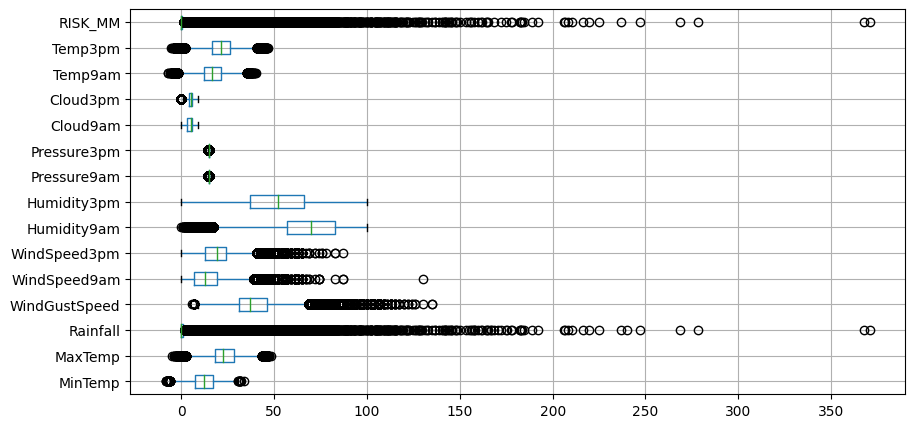

In [ ]:
plt.figure(figsize=(10,5))
df.boxplot(column=['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
             'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm','RISK_MM'], vert=False)
plt.show()

**Rango intercuartil** :  Se Identifican los outliers.  Este enfoque es especialmente útil cuando los datos no siguen una distribución normal.

Se utiliza método clip() , que no  elimina los valores atípicos (outliers), sino que los ajusta para que estén dentro del rango especificado. Donde los valores que estén por encima del límite superior serán establecidos en el valor del límite superior, y los valores que estén por debajo del límite inferior serán establecidos en el valor del límite inferior. Esto significa que los valores atípicos se ajustaran para que estén dentro del rango permitido, en lugar de eliminarlos por completo.








In [ ]:
col_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
           'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
           'Temp9am', 'Temp3pm', 'RISK_MM']

# Calcular el rango intercuartílico (IQR)

Q1 = df[col_outliers].quantile(0.25)
Q3 = df[col_outliers].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Aplicar el método clip utilizando los valores de lower y upper a todas las columnas en la lista 'columna'
df[col_outliers] = df[col_outliers].clip(lower=lower, upper=upper, axis=1)


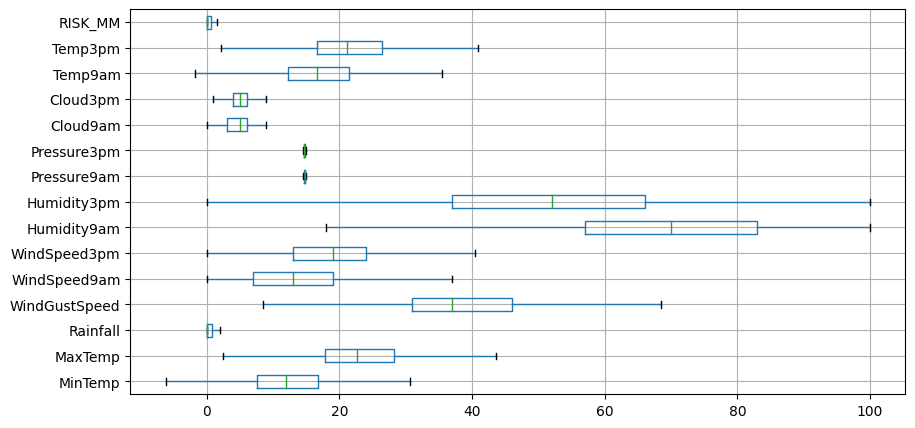

In [ ]:
plt.figure(figsize=(10,5))
df.boxplot(column=['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
             'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm','RISK_MM'], vert=False)
plt.show()

In [ ]:
df.head(10)

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1  2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2  2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3  2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4  2008-12-05   Albury     17.5     32.3       1.0           W           41.0   
5  2008-12-06   Albury     14.6     29.7       0.2         WNW           56.0   
6  2008-12-07   Albury     14.3     25.0       0.0           W           50.0   
7  2008-12-08   Albury      7.7     26.7       0.0           W           35.0   
8  2008-12-09   Albury      9.7     31.9       0.0         NNW           68.5   
9  2008-12-10   Albury     13.1     30.1       1.4           W           28.0   

  WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  Pressure9am  \
0          W        WNW          20.0  ...         22.0    14.615574   
1        NNW        WSW           4.0  ...         25.0    14.657636   
2          W        WSW          19.0  ...         30.0    14.614124   
3         SE          E          11.0  ...         16.0    14.759163   
4        ENE         NW           7.0  ...         33.0    14.660536   
5          W          W          19.0  ...         23.0    14.637330   
6         SW          W          20.0  ...         19.0    14.643132   
7        SSE          W           6.0  ...         19.0    14.698246   
8         SE         NW           7.0  ...          9.0    14.632979   
9          S        SSE          15.0  ...         27.0    14.605422   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0    14.606872       8.0       5.0     16.9     21.8         No      0.0   
1    14.617025       5.0       5.0     17.2     24.3         No      0.0   
2    14.630078       5.0       2.0     21.0     23.2         No      0.0   
3    14.689544       5.0       5.0     18.1     26.5         No      1.0   
4    14.590918       7.0       8.0     17.8     29.7         No      0.2   
5    14.582215       5.0       5.0     20.6     28.9         No      0.0   
6    14.622826       1.0       5.0     18.1     24.6         No      0.0   
7    14.650384       5.0       5.0     16.3     25.5         No      0.0   
8    14.556108       5.0       5.0     18.3     30.2         No      1.4   
9    14.586566       5.0       5.0     20.1     28.2        Yes      0.0   

  RainTomorrow  
0           No  
1           No  
2           No  
3           No  
4           No  
5           No  
6           No  
7           No  
8          Yes  
9           No  

[10 rows x 22 columns]

In [ ]:
df_outl= df

In [ ]:
df_num=df

###**Transformacion Variables Categoricas**

In [ ]:
df_obj.columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
# Conteo de los niveles en las diferentes columnas categóricas
for col in df_obj:
  print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna Date: 3436 subniveles
Columna Location: 49 subniveles
Columna WindGustDir: 16 subniveles
Columna WindDir9am: 16 subniveles
Columna WindDir3pm: 16 subniveles
Columna RainToday: 2 subniveles
Columna RainTomorrow: 2 subniveles


In [ ]:
# Mostrar los valores únicos de cada columna
print("Valores únicos en 'Date':", df['Date'].unique())
print("Valores únicos en 'Location':", df['Location'].unique())
print("Valores únicos en 'WindGustDir':", df['WindGustDir'].unique())
print("Valores únicos en 'WindDir9am':", df['WindDir9am'].unique())
print("Valores únicos en 'WindDir3pm':", df['WindDir3pm'].unique())
print("Valores únicos en 'RainToday':", df['RainToday'].unique())
print("Valores únicos en 'RainTomorrow':", df['RainTomorrow'].unique())


Valores únicos en 'Date': ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
Valores únicos en 'Location': ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Valores únicos en 'WindGustDir': ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
Valores únicos en 'WindDir9am': ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
Valores únicos en 'WindDir3pm': ['WNW' 

##Transformación de variables categóricas en datos numéricos

*   Elemento de lista
*   Elemento de lista



**Codificación binaria de variables categóricas usando mapeo**
El código utiliza el mapeo para las variables binarias como 'RainToday' y 'RainTomorrow' se convierten en valores numéricos binarios (0 y 1). Este enfoque es ideal cuando se desea representar respuestas binarias o categorías con solo dos posibles valores ('Yes' y 'No'). Se emplea el método .map() de Pandas para transformar 'Yes' a 1 y 'No' a 0 en las columnas.


In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Mapear 'RainToday' y 'RainTomorrow' a 0 y 1
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})


La técnica utilizada en este caso es "mapeo" o "codificación de etiquetas". Consiste en asignar un número único a cada  etiqueta en una columna categórica.

Se ha creado un diccionario city_mapping donde cada ciudad tiene asignado un número único.

In [ ]:
# Crear un diccionario con la asignación de números a cada ciudad
city_mapping = {
    'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4,
    'Newcastle': 5, 'NorahHead': 6, 'NorfolkIsland': 7, 'Penrith': 8, 'Richmond': 9,
    'Sydney': 10, 'SydneyAirport': 11, 'WaggaWagga': 12, 'Williamtown': 13,
    'Wollongong': 14, 'Canberra': 15, 'Tuggeranong': 16, 'MountGinini': 17,
    'Ballarat': 18, 'Bendigo': 19, 'Sale': 20, 'MelbourneAirport': 21, 'Melbourne': 22,
    'Mildura': 23, 'Nhil': 24, 'Portland': 25, 'Watsonia': 26, 'Dartmoor': 27,
    'Brisbane': 28, 'Cairns': 29, 'GoldCoast': 30, 'Townsville': 31, 'Adelaide': 32,
    'MountGambier': 33, 'Nuriootpa': 34, 'Woomera': 35, 'Albany': 36, 'Witchcliffe': 37,
    'PearceRAAF': 38, 'PerthAirport': 39, 'Perth': 40, 'SalmonGums': 41, 'Walpole': 42,
    'Hobart': 43, 'Launceston': 44, 'AliceSprings': 45, 'Darwin': 46, 'Katherine': 47,
    'Uluru': 48
}

# Aplicar el mapeo a la columna 'Location'
df['Location'] = df['Location'].replace(city_mapping)


In [ ]:
df.head()

Date  Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
0  2008-12-01         0     13.4     22.9       0.6           W   
1  2008-12-02         0      7.4     25.1       0.0         WNW   
2  2008-12-03         0     12.9     25.7       0.0         WSW   
3  2008-12-04         0      9.2     28.0       0.0          NE   
4  2008-12-05         0     17.5     32.3       1.0           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           44.0          W        WNW          20.0  ...         22.0   
1           44.0        NNW        WSW           4.0  ...         25.0   
2           46.0          W        WSW          19.0  ...         30.0   
3           24.0         SE          E          11.0  ...         16.0   
4           41.0        ENE         NW           7.0  ...         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0    14.615574    14.606872       8.0       5.0     16.9     21.8          0   
1    14.657636    14.617025       5.0       5.0     17.2     24.3          0   
2    14.614124    14.630078       5.0       2.0     21.0     23.2          0   
3    14.759163    14.689544       5.0       5.0     18.1     26.5          0   
4    14.660536    14.590918       7.0       8.0     17.8     29.7          0   

   RISK_MM  RainTomorrow  
0      0.0             0  
1      0.0             0  
2      0.0             0  
3      1.0             0  
4      0.2             0  

[5 rows x 22 columns]

In [ ]:
df.shape

(140787, 22)

Se transforman las  variables categóricas restantes en datos numéricos

In [ ]:
# Obtener los valores únicos en 'WindGustDir'
unique_values = df['WindGustDir'].unique()

# Crear un diccionario de mapeo
mapping = {val: idx for idx, val in enumerate(unique_values)}

# Aplicar el mapeo a la columna 'WindGustDir'
df['WindGustDir'] = df['WindGustDir'].replace(mapping)


In [ ]:
# Obtener los valores únicos en 'WindDir9am'
unique_values = df['WindDir9am'].unique()

# Crear un diccionario de mapeo
mapping = {val: idx for idx, val in enumerate(unique_values)}

# Aplicar el mapeo a la columna 'WindDir9am'
df['WindDir9am'] = df['WindDir9am'].replace(mapping)


In [ ]:
# Obtener los valores únicos en 'WindDir3pm'
unique_values = df['WindDir3pm'].unique()

# Crear un diccionario de mapeo
mapping = {val: idx for idx, val in enumerate(unique_values)}

# Aplicar el mapeo a la columna 'WindDir3pm'
df['WindDir3pm'] = df['WindDir3pm'].replace(mapping)


**Variable Date**

Se convertirá los valores de la columna 'Date' al formato de fecha de Pandas.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


Se extraen las caracteristica de Date, año, mes y dia .

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [ ]:
df.drop(columns=['Year','Month','Day'], inplace=True)


In [ ]:
df.drop(columns=['Date'], inplace=True)

KeyError: "['Date'] not found in axis"

Se elimina la columna Date .

In [ ]:
df.sample(10)

Location   MinTemp   MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
100306  0.741150 -0.029423  1.164686  1.912332    -1.443977       1.768371   
90005   0.454893  1.362242  0.896814 -0.108257    -1.443977      -0.353688   
123773  1.242100  0.080034  0.657139 -0.613404     0.190722      -0.925012   
86549   0.383329  1.612430  1.094194 -0.108257     1.008071       1.360283   
124066  1.313664 -0.748711 -0.724517 -0.613404     0.803734      -0.190453   
140333  1.671485  1.065145  1.517150 -0.613404     0.599397      -0.027217   
4614   -1.620468 -0.654891  1.362066 -0.613404    -1.443977       1.360283   
115278  1.098971 -0.826895  0.135494 -0.613404     0.190722      -0.190453   
108006  0.884279 -0.107607 -0.146477 -0.108257    -1.443977      -0.353688   
6790   -1.548904 -0.592344 -0.315659 -0.613404     1.416746      -0.680159   

        WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  \
100306   -0.123489   -1.426766     -0.338022      1.475858  ...     0.700720   
90005    -0.575024   -0.549463      1.413955      1.357797  ...     0.264334   
123773    1.682651   -1.207440     -0.338022     -1.357615  ...    -1.238775   
86549    -1.252327   -0.330137      2.231544      1.711981  ...    -0.220540   
124066    1.456883   -0.768789     -0.805215      0.177183  ...     0.603746   
140333   -1.026559   -0.549463      0.596366      0.059121  ...    -0.433371   
4614      0.328046   -0.988114     -1.155611      1.121674  ...    -1.772136   
115278   -1.026559    0.327840      0.713164     -1.121493  ...    -1.529699   
108006    1.231116    0.547165     -0.922014     -0.649247  ...     0.603746   
6790      0.779581    0.766491      0.129172     -1.357615  ...    -0.414489   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
100306    -1.618465    -1.916071 -0.714453  0.616801  1.144820  0.010709   
90005      0.581650     0.493547  0.154823  0.129620  1.483674  0.965393   
123773    -0.010105    -0.009728  0.154823  0.129620  0.451710  0.733955   
86549     -0.161837    -0.345244 -0.714453 -1.819104  1.745515  1.066648   
124066     0.930634     0.890066  0.154823  0.129620 -0.811291 -0.625747   
140333    -0.450128    -0.665510 -2.018368  0.129620  1.391259  1.710140   
4614      -1.117750    -1.626307  0.154823  0.129620  0.143661  1.543990   
115278     1.173405     1.012072 -1.583730 -1.819104 -0.580254  0.300007   
108006    -0.146664    -0.482501  0.589462  0.129620 -0.025766 -0.278589   
6790       1.021673     0.859565 -2.018368 -1.819104 -0.564852 -0.191800   

        RainToday   RISK_MM  RainTomorrow  
100306   1.864356  1.332692      1.874102  
90005   -0.536378  0.677534     -0.533589  
123773  -0.536378 -0.632783     -0.533589  
86549   -0.536378 -0.305204     -0.533589  
124066  -0.536378  1.824061      1.874102  
140333  -0.536378  1.824061      1.874102  
4614    -0.536378 -0.632783     -0.533589  
115278  -0.536378 -0.632783     -0.533589  
108006  -0.536378  1.005113     -0.533589  
6790    -0.536378 -0.632783     -0.533589  

[10 rows x 21 columns]

In [ ]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0         0     13.4     22.9       0.6            0           44.0   
1         0      7.4     25.1       0.0            1           44.0   
2         0     12.9     25.7       0.0            2           46.0   
3         0      9.2     28.0       0.0            3           24.0   
4         0     17.5     32.3       1.0            0           41.0   

   WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Cloud9am  \
0           0           0          20.0          24.0  ...       8.0   
1           1           1           4.0          22.0  ...       5.0   
2           0           1          19.0          26.0  ...       5.0   
3           2           2          11.0           9.0  ...       5.0   
4           3           3           7.0          20.0  ...       7.0   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  RainTomorrow  Year  Month  \
0       5.0     16.9     21.8          0      0.0             0  2008     12   
1       5.0     17.2     24.3          0      0.0             0  2008     12   
2       2.0     21.0     23.2          0      0.0             0  2008     12   
3       5.0     18.1     26.5          0      1.0             0  2008     12   
4       8.0     17.8     29.7          0      0.2             0  2008     12   

   Day  
0    1  
1    2  
2    3  
3    4  
4    5  

[5 rows x 24 columns]

###Normalizacion

Normalizaremos las características para que las características que tienen valores grandes no dominen el entrenamiento.<br>
Al observar las formas de la distribución de cada característica, aquellas con una forma de campana de distribución más o menos normal se normalizarán mediante el método Zscore.<br>
Mientras que aquellos con valores grandes y bajos variables se normalizarán utilizando el método Min-Max.

In [ ]:
df_sc= df
df_escala=df

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas para normalizar
df_numerico = df.select_dtypes(include=['int64', 'float64'])

# Inicializar el escalador StandardScaler
scaler = StandardScaler()

# Normalizar los datos numéricos seleccionados
df[df_numerico.columns] = scaler.fit_transform(df[df_numerico.columns])

# Mostrar las primeras filas del dataframe normalizado


In [ ]:
df.head()

Location   MinTemp   MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0 -1.692032  0.189490 -0.047787  0.144317    -1.443977       0.380871   
1 -1.692032 -0.748711  0.262380 -0.613404    -1.239640       0.380871   
2 -1.692032  0.111307  0.346972 -0.613404    -1.035302       0.544106   
3 -1.692032 -0.467251  0.671238 -0.613404    -0.830965      -1.251483   
4 -1.692032  0.830595  1.277475  0.649464    -1.443977       0.136018   

   WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  \
0   -1.703862   -1.646091      0.713164      0.649428  ...    -1.432724   
1   -1.478094   -1.426766     -1.155611      0.413306  ...    -1.287262   
2   -1.703862   -1.426766      0.596366      0.885551  ...    -1.044825   
3   -1.252327   -1.207440     -0.338022     -1.121493  ...    -1.723649   
4   -1.026559   -0.988114     -0.805215      0.177183  ...    -0.899363   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
0    -1.512253    -1.245038  1.458738  0.129620 -0.010364  0.010709   
1    -1.072230    -1.138283  0.154823  0.129620  0.035844  0.372332   
2    -1.527426    -1.001026  0.154823 -1.331923  0.621137  0.213218   
3    -0.010105    -0.375746  0.154823  0.129620  0.174466  0.690560   
4    -1.041883    -1.412796  1.024100  1.591163  0.128258  1.153437   

   RainToday   RISK_MM  RainTomorrow  
0  -0.536378 -0.632783     -0.533589  
1  -0.536378 -0.632783     -0.533589  
2  -0.536378 -0.632783     -0.533589  
3  -0.536378  1.005113     -0.533589  
4  -0.536378 -0.305204     -0.533589  

[5 rows x 21 columns]

StandardScaler: Transforma los datos para que tengan una media de 0 y una desviación estándar de 1 (z-score normalization). Es útil cuando queremos que los datos tengan una distribución normal estándar.

**Explicación de los Valores Normalizados**

Cuando aplicamos StandardScaler, los valores son transformados de tal manera que:

Los valores por encima de la media se convierten en valores positivos.

Los valores por debajo de la media se convierten en valores negativos.
Los valores exactamente en la media se convierten en cero.

**Caracteristicas seleccionadas**

MinTemp, MaxTemp: Variables numéricas que representan la temperatura mínima y máxima son fundamentales para el clustering basado en características climáticas.

Rainfall: La cantidad de lluvia es crucial para identificar patrones de precipitación en diferentes clusters.

WindGustSpeed, WindSpeed9am, WindSpeed3pm: La velocidad del viento puede ser importante para identificar clusters basados en la intensidad del viento en diferentes momentos del día.

Humidity9am, Humidity3pm: La humedad relativa es vital para entender los patrones de humedad en diferentes momentos del día.

Pressure9am, Pressure3pm: La presión atmosférica es importante para capturar variaciones en la presión que pueden influir en los patrones climáticos.

Temp9am, Temp3pm: Las temperaturas a las 9am y 3pm son cruciales para identificar patrones diurnos de temperatura.

Para  aplicar K-Means para clustering en datos meteorológicos,se usan las  variables numéricas que capturen las características climáticas relevantes. Y las variables como la ubicación, dirección del viento y fechas no son apropiadas para mantener el enfoque en atributos numéricos que K-Means puede utilizarpara identificar clusters significativos basados en la similitud numérica.

**Analisis de Correlacion**

 Variables como MinTemp, MaxTemp, Temp9am, y Temp3pm muestran una fuerte correlación con otras variables climáticas, por lo que su retención podría ser beneficiosa.

Elimina variables redundantes: Si 2 variables  están altamente correlacionadas entre sí como  Temp9am y Temp3pm con MaxTemp, se elimino Temp3pm para evitar la multicolinealidad.

In [ ]:
# Calcular la matriz de correlación
corr_matrix = df.corr()
corr

MinTemp   MaxTemp  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
Location       0.072177  0.105858       0.058666      0.080406      0.060205   
MinTemp        1.000000  0.735164       0.182663      0.178613      0.176649   
MaxTemp        0.735164  1.000000       0.081966      0.016885      0.053261   
Rainfall       0.051547 -0.258360       0.149235      0.102999      0.080040   
WindGustDir    0.100868  0.118174      -0.045456      0.044558     -0.034663   
WindGustSpeed  0.182663  0.081966       1.000000      0.585963      0.664737   
WindDir9am    -0.032099  0.029417      -0.005703     -0.046671     -0.017417   
WindDir3pm     0.070285  0.044386      -0.099347     -0.039526     -0.070380   
WindSpeed9am   0.178613  0.016885       0.585963      1.000000      0.511643   
WindSpeed3pm   0.176649  0.053261       0.664737      0.511643      1.000000   
Humidity9am   -0.234974 -0.503870      -0.222690     -0.274592     -0.149551   
Humidity3pm    0.000766 -0.508214      -0.039369     -0.033569      0.013888   
Pressure9am   -0.432130 -0.318200      -0.420706     -0.211118     -0.273014   
Pressure3pm   -0.440671 -0.405768      -0.379294     -0.162147     -0.235323   
Cloud9am       0.041776 -0.235372       0.042935      0.003140      0.030701   
Cloud3pm      -0.003672 -0.219776       0.071255      0.028004      0.005690   
Temp9am        0.901059  0.885981       0.157625      0.131309      0.166849   
Temp3pm        0.708472  0.980766       0.045791      0.003611      0.029164   
RainToday      0.055888 -0.228550       0.146721      0.101619      0.077709   
RISK_MM        0.079149 -0.191853       0.227988      0.090263      0.090569   
RainTomorrow   0.083915 -0.159134       0.218022      0.087608      0.082506   
Year           0.038087  0.056339      -0.025636     -0.020778     -0.036726   
Month         -0.203842 -0.164787       0.056320      0.051631      0.059363   
Day            0.001088 -0.000507      -0.010224     -0.009336     -0.010441   

               Humidity9am  Humidity3pm  Pressure9am  Pressure3pm   Temp9am  \
Location         -0.141177    -0.087264    -0.099268    -0.103637  0.116856   
MinTemp          -0.234974     0.000766    -0.432130    -0.440671  0.901059   
MaxTemp          -0.503870    -0.508214    -0.318200    -0.405768  0.885981   
Rainfall          0.390809     0.410964    -0.179702    -0.094915 -0.116750   
WindGustDir      -0.053760    -0.054114     0.118260     0.111179  0.108891   
WindGustSpeed    -0.222690    -0.039369    -0.420706    -0.379294  0.157625   
WindDir9am       -0.010748    -0.032642    -0.004828    -0.030923 -0.000417   
WindDir3pm        0.025230     0.070567     0.122990     0.093802  0.061217   
WindSpeed9am     -0.274592    -0.033569    -0.211118    -0.162147  0.131309   
WindSpeed3pm     -0.149551     0.013888    -0.273014    -0.235323  0.166849   
Humidity9am       1.000000     0.664118     0.133582     0.178580 -0.472175   
Humidity3pm       0.664118     1.000000    -0.021777     0.054345 -0.226655   
Pressure9am       0.133582    -0.021777     1.000000     0.960374 -0.404836   
Pressure3pm       0.178580     0.054345     0.960374     1.000000 -0.448039   
Cloud9am          0.358616     0.401309    -0.096512    -0.042125 -0.124451   
Cloud3pm          0.274105     0.400391    -0.107149    -0.059405 -0.113673   
Temp9am          -0.472175    -0.226655    -0.404836    -0.448039  1.000000   
Temp3pm          -0.495134    -0.558267    -0.279041    -0.374992  0.859014   
RainToday         0.353324     0.374705    -0.176718    -0.098331 -0.097848   
RISK_MM           0.297253     0.487344    -0.243646    -0.216193 -0.046771   
RainTomorrow      0.257877     0.442699    -0.233378    -0.214231 -0.026954   
Year              0.010809    -0.007252     0.027748     0.023365  0.042581   
Month            -0.090381    -0.018869     0.037715     0.027948 -0.135472   
Day               0.015217     0.012747    -0.019981    -0.020209 -0.000999   

                Temp3pm  
Location     

Estas variables parecen tener correlaciones moderadas con otras características pero no tan altas como para indicar una redundancia significativa. Además, son variables que proporcionan información importante sobre condiciones climáticas y presión atmosférica, lo cual es relevante para el análisis en un contexto de datos meteorológicos.

##**COLUMNAS RELEVANTES PARA K-MEANS**

**Características de las entradas**

Las  características que se utilicen como entradas para aplicar el algoritmo k-means, son de valores numéricos continuos .
- Estan Normalizadas para tener una misma escala
-No conviene utilizar features que estén correlacionados o que sean escalares de otros.


In [ ]:
import pandas as pd

# Aquí se asume que tienes un DataFrame llamado df con todas tus variables
# Seleccionar las variables específicas
selected_columns = ['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am',
                    'WindSpeed3pm', 'Humidity9am', 'Pressure9am',
                    'Pressure3pm', 'Temp9am']

# Crear el nuevo DataFrame df_means con las variables seleccionadas
df1 = df[selected_columns].copy()

# Verificar que se haya creado correctamente
df1.head() # Mostrar las primeras filas para verificar

# Ahora df_means contiene solo las columnas seleccionadas


MinTemp   MaxTemp  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0  0.189490 -0.047787       0.380871      0.713164      0.649428     0.110036   
1 -0.748711  0.262380       0.380871     -1.155611      0.413306    -1.323919   
2  0.111307  0.346972       0.544106      0.596366      0.885551    -1.642576   
3 -0.467251  0.671238      -1.251483     -0.338022     -1.121493    -1.270810   
4  0.830595  1.277475       0.136018     -0.805215      0.177183     0.694240   

   Pressure9am  Pressure3pm   Temp9am  
0    -1.512253    -1.245038 -0.010364  
1    -1.072230    -1.138283  0.035844  
2    -1.527426    -1.001026  0.621137  
3    -0.010105    -0.375746  0.174466  
4    -1.041883    -1.412796  0.128258

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 142192
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        140787 non-null  float64
 1   MaxTemp        140787 non-null  float64
 2   WindGustSpeed  140787 non-null  float64
 3   WindSpeed9am   140787 non-null  float64
 4   WindSpeed3pm   140787 non-null  float64
 5   Humidity9am    140787 non-null  float64
 6   Pressure9am    140787 non-null  float64
 7   Pressure3pm    140787 non-null  float64
 8   Temp9am        140787 non-null  float64
dtypes: float64(9)
memory usage: 10.7 MB


#**FASE 4 : MODELADO**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


**Estandarizacion de los datos**

In [ ]:
# Estandarización de los datos
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df1)


##**Metodo Elbow**



Se hace un grafico de la función objetivo en función de la elección de k y se elige el k correspondiente al punto donde agregar un cluster más no baja significativamente el valor que queremos minimzar. Esto se puede detectar a ojo o utilizando algún paquete de python como 'kneed'

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

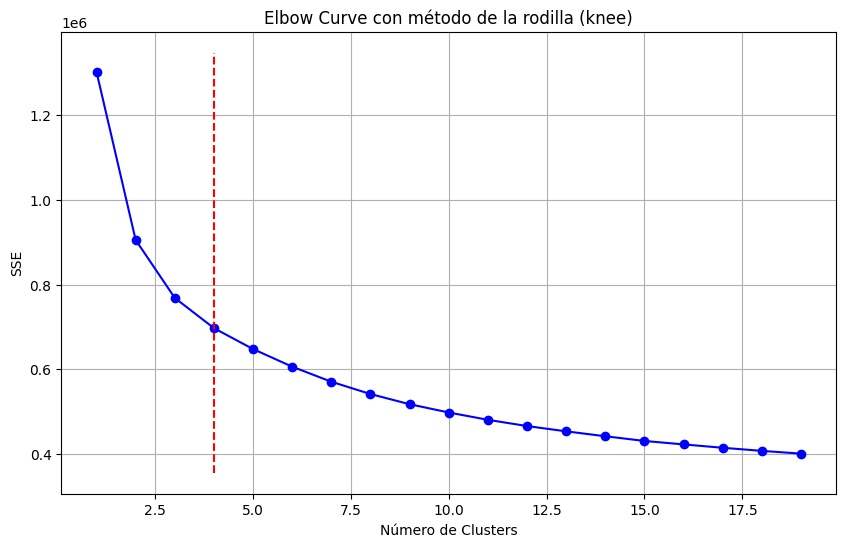

El número óptimo de clusters según el método de la rodilla es: 4


In [ ]:
from kneed import KneeLocator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Definir el rango de números de clusters que queremos probar
num_clusters = range(1, 20)
inertias = []  # Sum of Squared Errors

# Aplicar K-Means para cada número de clusters y guardar la inercia
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df1)
    inertias.append(kmeans.inertia_)  # Inertia: Sum of squared distances to closest cluster center

# Encontrar el punto de inflexión usando KneeLocator
knee = KneeLocator(num_clusters, inertias, curve='convex', direction='decreasing')

# Graficar la curva de SSE vs número de clusters
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, inertias, marker='o', linestyle='-', color='b')
plt.vlines(knee.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Elbow Curve con método de la rodilla (knee)')
plt.grid(True)
plt.show()

print(f"El número óptimo de clusters según el método de la rodilla es: {knee.elbow}")


##**Aplicar K-Means**

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_df)

# Añadir los clusters al dataset original
df1['Cluster'] = clusters

In [ ]:
# Añadir las etiquetas de cluster al DataFrame original
df1['Cluster'] = cluster_labels

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

**Centroides**
 los centroides de cada cluster después de aplicar el algoritmo K-Means. Cada fila corresponde a un cluster y cada columna muestra el valor medio de una variable climática específica para ese cluster. Aquí tienes un análisis básico basado en los centroides

In [ ]:
# Análisis de los clusters
cluster_summary = df1.groupby('Cluster').mean()
cluster_summary


MinTemp   MaxTemp  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
Cluster                                                                  
0        0.161846  0.209661      -0.399645     -0.376388     -0.377484   
1        1.172520  1.268762       0.351875      0.250665      0.296163   
2       -0.253239 -0.597212       1.154922      1.019900      1.022791   
3       -1.014241 -0.886724      -0.705676     -0.541761     -0.581782   

         Humidity9am  Pressure9am  Pressure3pm   Temp9am  
Cluster                                                   
0          -0.056433     0.079391     0.052919  0.188168  
1          -0.694394    -0.773087    -0.862866  1.304023  
2           0.076369    -0.521476    -0.380786 -0.411946  
3           0.608664     0.975036     0.975010 -1.035722

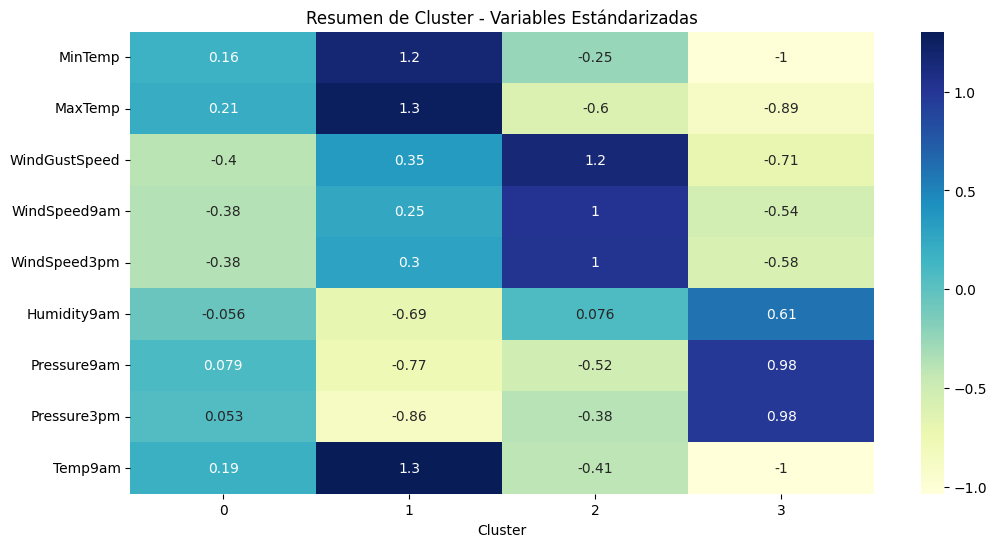

In [ ]:
# Visualización de los centroides
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_summary.T, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Resumen de Cluster - Variables Estándarizadas')
plt.show()


##**Interpretación de los Clusters**

**Cluster 0**

- MinTemp (0.161846) y MaxTemp (0.209661): Las temperaturas mínimas y máximas son moderadamente altas.
- WindGustSpeed (-0.399645), WindSpeed9am (-0.376388) y WindSpeed3pm (-0.377484): Las velocidades del viento son moderadamente bajas.
- Humidity9am (-0.056433): La humedad por la mañana es baja.
- Pressure9am (0.079391) y Pressure3pm (0.052919): Las presiones atmosféricas son ligeramente altas.
- Temp9am (0.188168): La temperatura por la mañana es moderadamente alta.

 Representa condiciones moderadamente cálidas con velocidades de viento y humedad moderadas.

**Cluster 1**

- MinTemp (1.172520) y MaxTemp (1.268762): Las temperaturas mínimas y máximas son muy altas.
- WindGustSpeed (0.351875), WindSpeed9am (0.250665) y WindSpeed3pm (0.296163): Las velocidades del viento son moderadamente altas.
- Humidity9am (-0.694394): La humedad por la mañana es muy baja.
- Pressure9am (-0.773087) y Pressure3pm (-0.862866): Las presiones atmosféricas son muy bajas.
- Temp9am (1.304023): La temperatura por la mañana es muy alta.

**Caracterizado por condiciones muy calurosas con altas velocidades de viento, baja humedad y presiones atmosféricas muy bajas , lo cual podría ser crítico para la gestión de riesgos en el sector agrícola y de seguros**.


**Cluster 2**

- MinTemp (-0.253239) y MaxTemp (-0.597212): Las temperaturas mínimas y máximas son moderadamente bajas.
- WindGustSpeed (1.154922), WindSpeed9am (1.019900) y WindSpeed3pm (1.022791): Las velocidades del viento son muy altas.
- Humidity9am (0.076369): La humedad por la mañana es moderada.
- Pressure9am (-0.521476) y Pressure3pm (-0.380786): Las presiones atmosféricas - son moderadamente bajas.
- Temp9am (-0.411946): La temperatura por la mañana es moderadamente baja.

**Presenta condiciones frescas con velocidades de viento muy altas y presiones moderadamente bajas**

**Cluster 3**

- MinTemp (-1.014241) y MaxTemp (-0.886724): Las temperaturas mínimas y máximas son muy bajas.
- WindGustSpeed (-0.705676), WindSpeed9am (-0.541761) y WindSpeed3pm (-0.581782): Las velocidades del viento son moderadamente bajas.
- Humidity9am (0.608664): La humedad por la mañana es alta.
- Pressure9am (0.975036) y Pressure3pm (0.975010): Las presiones atmosféricas son muy altas.
- Temp9am (-1.035722): La temperatura por la mañana es muy baja.

**Indica condiciones muy frías con velocidades de viento y humedad moderadas pero presiones atmosféricas muy altas**.
-MinTemp y MaxTemp son más bajos, Humidity9am es alto y Pressure9am es alto, podrías inferir condiciones más frescas y estables que podrían ser más favorables para ciertos tipos de cultivos o actividades agrícolas específicas.

##**Visualizaciones**


**Visualizacion 1** por Temperatura Mínima vs Temperatura Máxima con Centroides

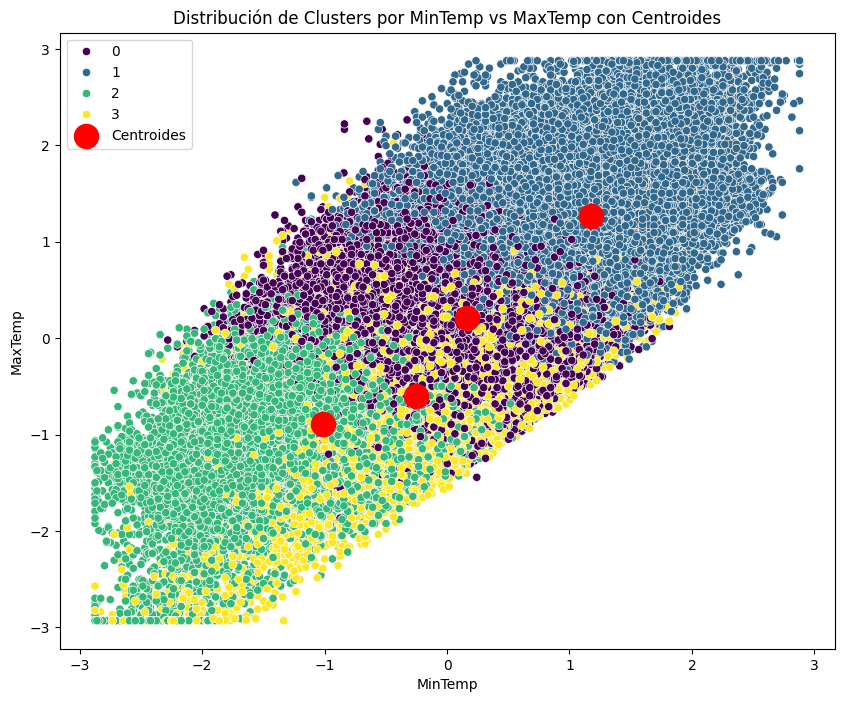

In [ ]:

# Visualización del scatter plot con centroides
plt.figure(figsize=(10, 8))
sns.scatterplot(x='MinTemp', y='MaxTemp', hue='Cluster', data=df1, palette='viridis', legend='full')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=300, c='red', label='Centroides')
plt.title('Distribución de Clusters por MinTemp vs MaxTemp con Centroides')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.legend()
plt.show()

 En este gráfico, Los centroides (marcados en rojo) representan las coordenadas promedio de cada cluster en el espacio definido por las variables MinTemp y MaxTemp.

**Visualización 2:**

 Humidity9am vs Pressure9am

Este gráfico muestra la relación entre la humedad a las 9am y la presión atmosférica a las 9am, coloreado por los clusters identificados.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


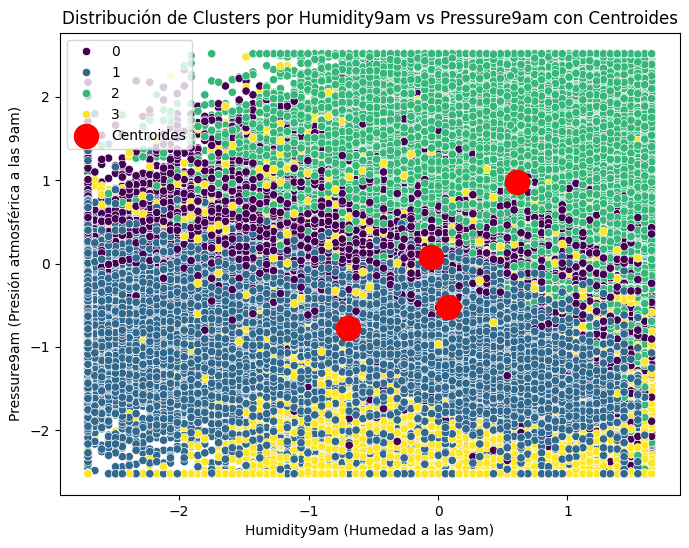

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Humidity9am', y='Pressure9am', hue='Cluster', data=df1, palette='viridis', legend='full')
plt.scatter(centroids[:, 5], centroids[:, 6], marker='o', s=300, c='red', label='Centroides')
plt.title('Distribución de Clusters por Humidity9am vs Pressure9am con Centroides')
plt.xlabel('Humidity9am (Humedad a las 9am)')
plt.ylabel('Pressure9am (Presión atmosférica a las 9am)')
plt.legend()
plt.show()


**Visualizacion 3**

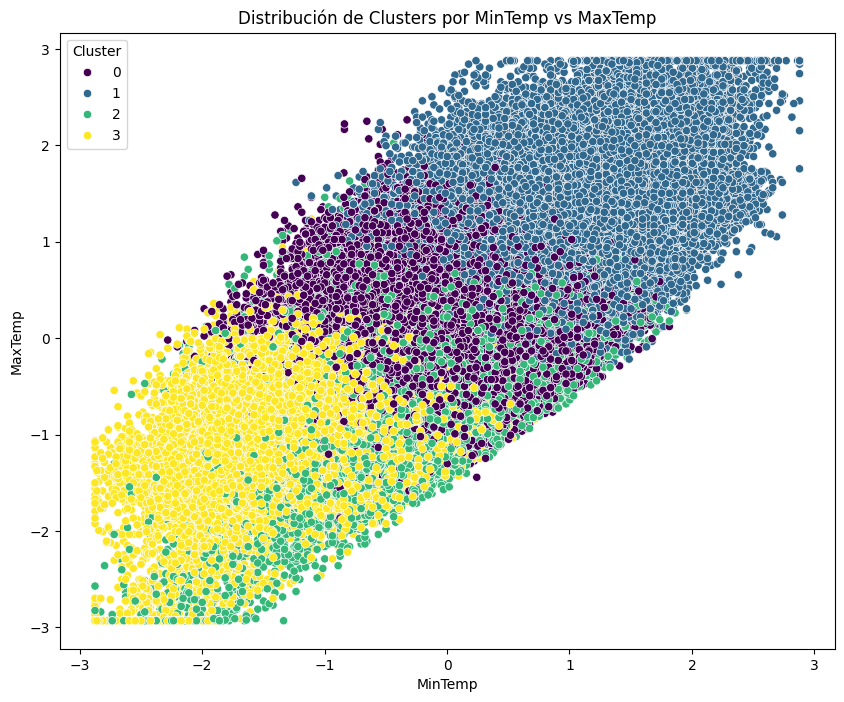

In [ ]:
# Visualización de los clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='MinTemp', y='MaxTemp', hue='Cluster', data=df1, palette='viridis', legend='full')
plt.title('Distribución de Clusters por MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()


Este gráfico te permitirá visualizar cómo se agrupan las temperaturas mínimas y máximas en diferentes clusters .Se observa si hay patrones distintivos en la relación entre estas dos variables climáticas.

**Visualizacion 4**

In [ ]:
sns.pairplot(df1[['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Cluster']], hue='Cluster', palette='viridis')
plt.suptitle('Pairplot de Variables Relevantes por Cluster')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

**Visualización5**

Humidity9am, Pressure9am y Temp9am
visualizar la relación entre múltiples variables simultáneamente, coloreadas por los clusters.

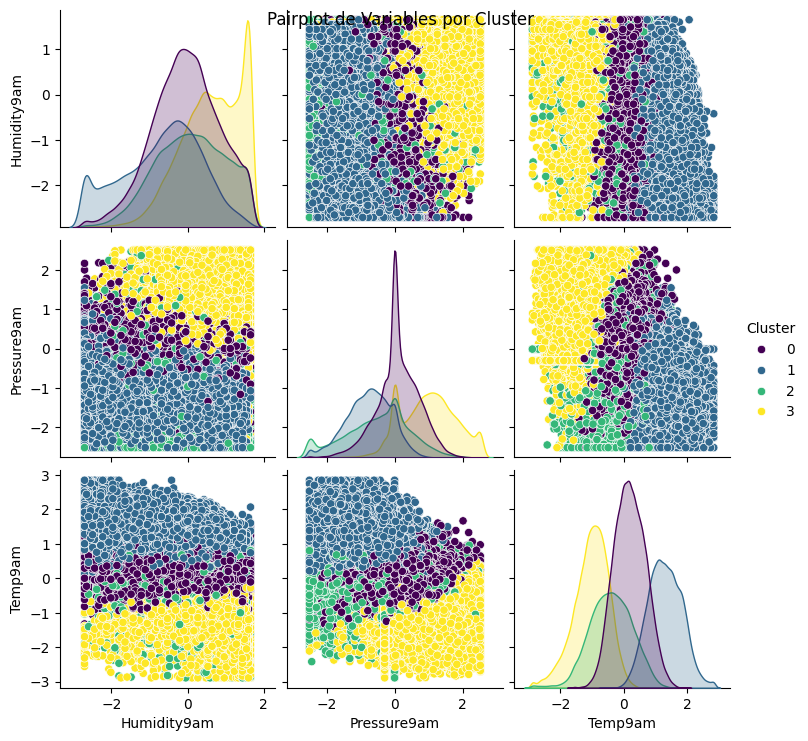

In [ ]:
sns.pairplot(df1, vars=['Humidity9am', 'Pressure9am', 'Temp9am'], hue='Cluster', palette='viridis')
plt.suptitle('Pairplot de Variables por Cluster')
plt.show()


Interpretación:

Este gráfico muestra la distribución conjunta de la humedad matutina, la presión atmosférica matutina y la temperatura matutina para cada cluster.

#**Patrones Climáticos Principales**


Los clusters identificados revelan varios patrones climáticos claves en Australia, cada uno caracterizado por combinaciones específicas de variables climáticas.estos son:

 **Cluster 0:** Puede representar días moderados con condiciones de viento y presión atmosférica estables.

**Cluster 1**: Indica días cálidos y secos con altas temperaturas máximas y velocidades de viento moderadas.

**Cluster 2**: Podría reflejar condiciones frescas y húmedas con temperaturas moderadas pero altas velocidades de viento.

**Cluster 3**: Quizás represente días fríos y estables con baja humedad y presiones atmosféricas más altas.

Estos patrones pueden ser esenciales para entender cómo varían las condiciones climáticas a lo largo del tiempo y el espacio en Australia, lo que es crucial para la agricultura.

Los clusters muetsran diferentes patrones climáticos representados por los clusters identificados. Estos clusters reflejan condiciones climáticas que varían desde días cálidos y secos con altas temperaturas (Cluster 1) hasta condiciones más frescas y húmedas asociadas con inviernos (Cluster 3). Además, se observa la presencia de condiciones moderadas y estables (Cluster 0) así como condiciones frescas y ventosas (Cluster 2).


**Características Climáticas Relevantes**

Variables como temperatura, velocidad del viento, humedad son influyentes en la segmentación climática según los centroides y la estructura de los clusters. Estas variables pueden ser cruciales para prever eventos climáticos críticos .

##**Insights**

**Impacto en la Agricultura:**

Utilizar los clusters para anticipar condiciones climáticas favorables o adversas para diferentes cultivos. Para ajustar calendarios de siembra y cosecha según los clusters predominantes.

-Loss clusters podrían indicar condiciones ideales para el cultivo de frutas de verano, mientras que otros podrían señalar riesgos potenciales de heladas tardías.


**Implementar sistemas de alerta temprana**
 Se basan  en los clusters para comunidades agrícolas vulnerables a condiciones climáticas extremas.



**Patrones Estacionales Claros**

Los clusters identificados muestran patrones estacionales distintivos en diferentes regiones de Australia.Algunos clusters, como el Cluster 1, representan condiciones de verano con altas temperaturas y baja humedad, mientras que otros, como el Cluster 3, podrían indicar inviernos más frescos con presiones atmosféricas más altas.

**"Datos de Características Climáticas para Nuevas Muestras"**

In [ ]:
import numpy as np

# Suponiendo que tienes nuevas muestras en un formato similar a df1, por ejemplo:
X_nuevas= np.array([[20.5, 30.5, 40.2, 15.3, 20.1, 80.0, 1010.1, 1005.5, 25.2],
                  [15.0, 25.0, 35.0, 10.0, 15.0, 75.0, 1015.0, 1010.0, 20.0]])

# Predecir los clusters para las nuevas muestras usando el modelo K-Means entrenado
nuevas_labels = kmeans.predict(X_nuevas)

# Imprimir las etiquetas asignadas a las nuevas muestras
print(nuevas_labels)


[3 3]


 Las características proporcionadas en X_nueva, ambas muestras se agrupan más cercanamente con los datos representativos del cluster 3 identificado por el algoritmo K-Means.

**CONCLUSION**

K-Means ha permitido identificar y categorizar patrones climáticos significativos en diferentes regiones de Australia. Estos patrones incluyen desde condiciones de verano con altas temperaturas y baja humedad hasta inviernos más frescos con presiones atmosféricas más altas.

Estos insights son fundamentales para la planificación agrícola. Este análisis ofrece una base sólida para tomar decisiones estratégicas informadas que mejoren la adaptabilidad de los cultivos frente a variaciones climáticas en Australia.






